In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system, solve_for_sns_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [2]:
# record runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve_and_test_small_system() # NC(50) - SOC(2) - SC(50)
#mu_orbital = -3.5, orbital_indicator = 's', F_sc_initial_orbital = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermition:  True
Iteration nr. 1


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/system_class.py:831: RuntimeWarning: divide by zero encountered in true_divide
  self.F_matrix[0, :] = self.F_matrix[0,:] / (self.F_matrix[0,:]/self.F_matrix[-1, :]) * phaseDiff
/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/system_class.py:831: RuntimeWarning: invalid value encountered in true_divide
  self.F_matrix[0, :] = self.F_matrix[0,:] / (self.F_matrix[0,:]/self.F_matrix[-1, :]) * phaseDiff


delta_diff =  35.1988482308739
Iteration nr. 2
delta_diff =  8.913719173389818
Iteration nr. 3
delta_diff =  2.0125582086675915
Iteration nr. 4
delta_diff =  0.41020929134857653
Iteration nr. 5
delta_diff =  0.08915787296676753
Iteration nr. 6
delta_diff =  0.022287993373639493
Iteration nr. 7
delta_diff =  0.007466629326070001
Iteration nr. 8
delta_diff =  0.004069379758159758
Iteration nr. 9
delta_diff =  0.0032511806862996987
Iteration nr. 10
delta_diff =  0.0030137892282121664
Iteration nr. 11
delta_diff =  0.0029059094502124606
Time:  128.99916332700013


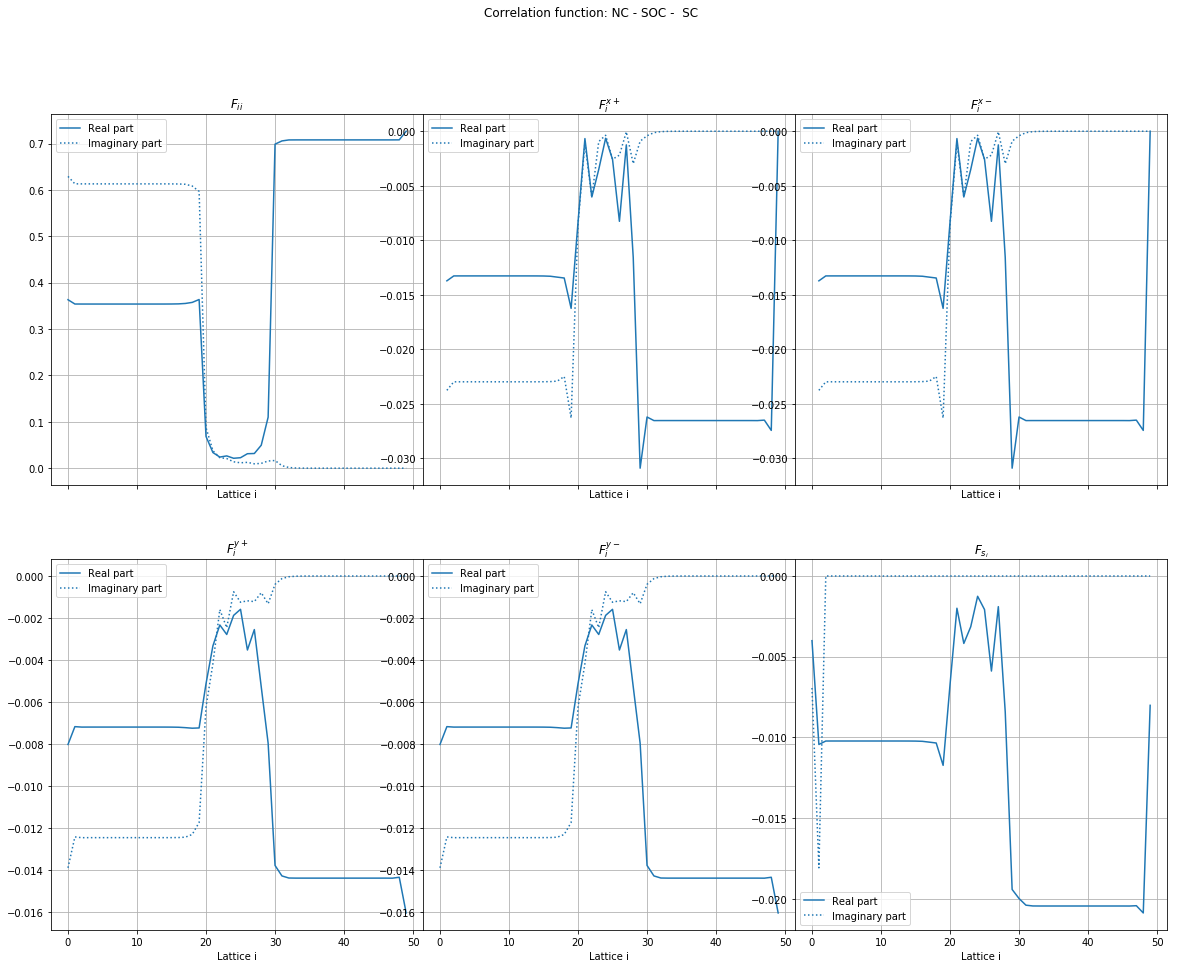

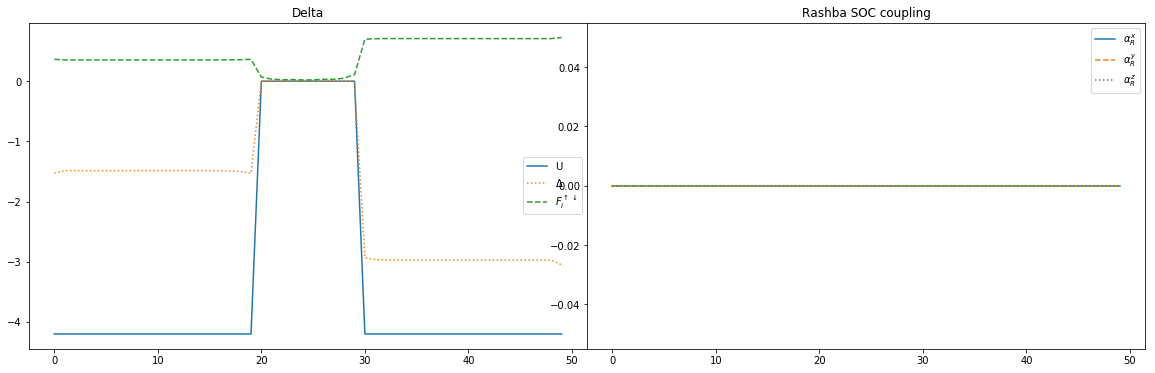

In [3]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

<h5>Correlation function

In [ ]:
# record runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve_and_return_system_and_F_matrix() # NC(50) - SOC(2) - SC(50)
#mu_orbital = -3.5, orbital_indicator = 's', F_sc_initial_orbital = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermition:  True
Iteration nr. 1


In [ ]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

<h5> Density of States

In [4]:
# record runtime
import timeit
start = timeit.default_timer()

ldos, energy_state = system.ldos_from_problem(0.01, 0.35, -6, 6) # resolution, sigma, min e, max e

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  283.5182600650005


In [5]:
print(ldos.shape)
print(energy_state.shape)

(50, 1200)
(1200,)


(1200,)
(50, 1200)


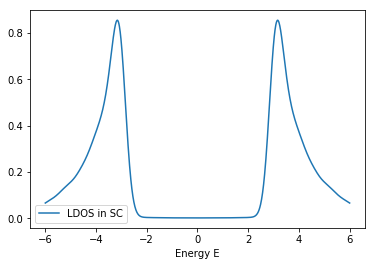

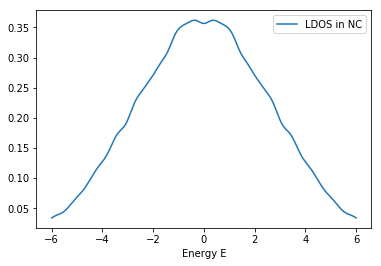

/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/plots.py:75: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(es, np.sum(ldos[L_sc_0+L_nc:L_sc_0+L_nc+L_soc], axis=0)/L_soc, label='LDOS in S0C')


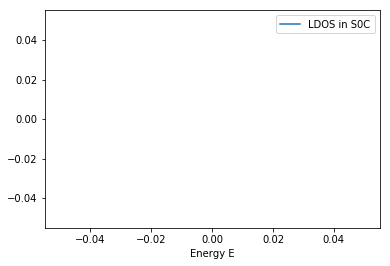

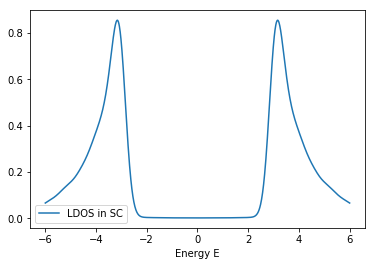

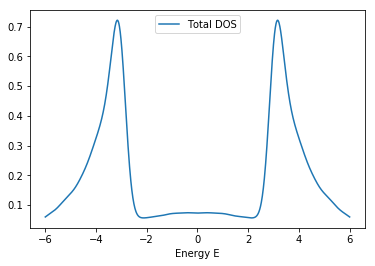

In [6]:
plot_density_of_states(energy_state, ldos, L_sc_0 = 20, L_nc=10, L_sc=20, L_soc=0)

Text(0,0.5,'#')

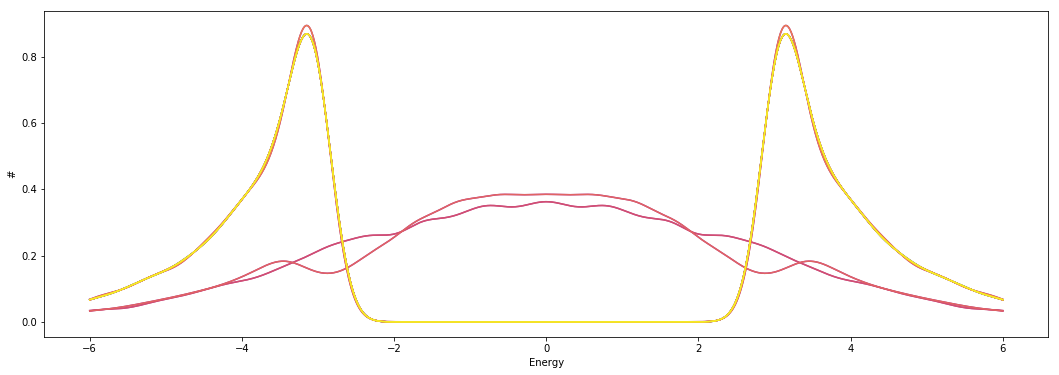

In [10]:
# plot all ldos for each medium

fig, ax = plt.subplots(figsize=(18, 6))
num_latticesites = ldos.shape[0]
step = 3
delta_range = 20
start = max(num_latticesites//2-delta_range, 0)
stop = min(num_latticesites//2+delta_range, num_latticesites)
#stop = Nx//2
for i in range(start, stop, step):
    ax.plot(energy_state, ldos[i, :], c = cm.plasma(float(i-start)/(stop-start)))
#ax.set_xlim()
ax.set_xlabel("Energy")
ax.set_ylabel("#")

Text(0,0.5,'Energy')

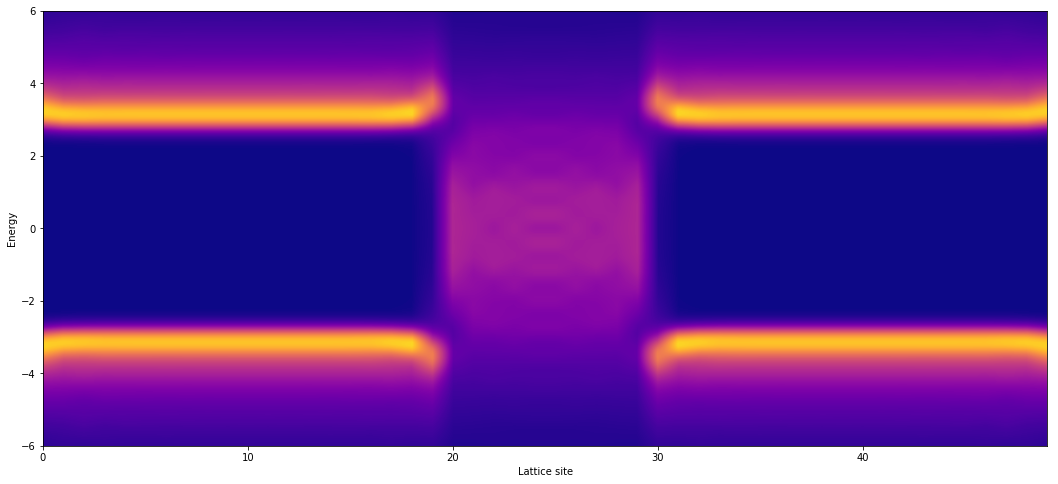

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(ldos.shape[0]), energy_state, ldos.T, cmap=cm.plasma, levels=np.linspace(0, 1, 500))
ax.set_xlabel("Lattice site")
ax.set_ylabel("Energy")

Text(0,0.5,'#')

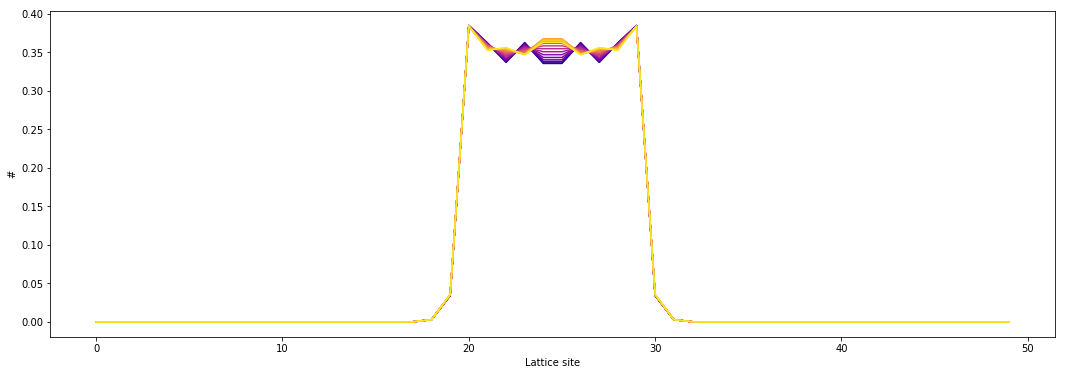

In [11]:
# Try to plot only middle energies
# Hva plottes egentlig?

fig = plt.figure(figsize=(18, 6))
num_energies = ldos.shape[1]
step = 3
delta_range = 50
start = num_energies//2
stop = min(num_energies//2+delta_range, num_energies)
for i in range(start, stop, step):
    plt.plot(ldos[:, i], c = cm.plasma(float(i-start)/(stop-start)))
plt.xlabel("Lattice site")
plt.ylabel("#")

In [ ]:
# Sjekk strøm!! hvordan låses fase, Beholde gammel metode??

In [1]:
def current_along_lattice(system):
    I = 1.0j
    sigma = 0.003
    current = np.zeros(system.L_x-1, dtype=np.complex128)
    coeff = 1.0 / (sigma * np.sqrt(2*np.pi)) / (system.L_y*system.L_z)
    #tanh_coeff = coeff * np.exp(-pow((system.eigenvalues) / sigma, 2)) # 1/(2*system.L_y*system.L_z) *(1-np.tanh(system.beta * system.eigenvalues / 2))
    tanh_coeff = 1/(np.exp(system.beta * system.eigenvalues)+1)#1/(system.L_y*system.L_z) *(1-np.tanh(system.beta * system.eigenvalues / 2)) #-
    
    t = system.t_0
   
    for ix in range(1, len(current)):   # -1 because it doesnt give sense to check last point for I+
        B = 0.0 + I/2 *(system.alpha_R_x_array[ix+1,1] - system.alpha_R_x_array[ix+1,2])
        C = 0.0 - I/2 *(system.alpha_R_x_array[ix,1] - system.alpha_R_x_array[ix,2])
        #print(B,C)
        #---- IMAG----#
        #:
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix, :, 1:, 1:]) * system.eigenvectors[4*(ix+1), :, 1:, 1:] * (np.exp(1.0j * system.ky_array[1:]) * np.exp(1.0j * system.kz_array[1:])))) #sigma = opp
        current[ix] += np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix+1), :, 1:, 1:]) * system.eigenvectors[4*ix, :, 1:, 1:] ))# * (np.exp(-1.0j * system.ky_array[1:]) * np.exp(-1.0j * system.kz_array[1:])))) #sigma = opp
        #:
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix+1, :, 1:, 1:]) * system.eigenvectors[4*(ix+1)+1, :, 1:, 1:] * (np.exp(1.0j * system.ky_array[1:]) * np.exp(1.0j * system.kz_array[1:])))) #sigma = ned
        current[ix] += np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix+1)+1, :, 1:, 1:]) * system.eigenvectors[4*ix+1, :, 1:, 1:] ))# * (np.exp(-1.0j * system.ky_array[1:]) * np.exp(-1.0j * system.kz_array[1:])))) #sigma = ned
        
        # v
        #:
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix+2, :, 1:, 1:]) * system.eigenvectors[4*(ix+1)+2, :, 1:, 1:])) #sigma = opp
        #current[ix] += np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix+1)+2, :, 1:, 1:]) * system.eigenvectors[4*ix+2, :, 1:, 1:])) #sigma = opp
        #:
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix+1+2, :, 1:, 1:]) * system.eigenvectors[4*(ix+1)+1+2, :, 1:, 1:])) #sigma = ned
        #current[ix] += np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix+1)+1+2, :, 1:, 1:]) * system.eigenvectors[4*ix+1+2, :, 1:, 1:])) #sigma = ned
       
    
        #--- REAL ----#
        #:
        """
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix, :, 1:, 1:]) * system.eigenvectors[4*(ix+1), :, 1:, 1:])) # opp opp
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix+1), :, 1:, 1:]) * system.eigenvectors[4*ix, :, 1:, 1:])) # opp opp
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix+1, :, 1:, 1:]) * system.eigenvectors[4*(ix+1) + 1, :, 1:, 1:])) #ned ned
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix+1) + 1, :, 1:, 1:]) * system.eigenvectors[4*ix + 1, :, 1:, 1:])) #ned ned
        #:
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix, :, 1:, 1:]) * system.eigenvectors[4*(ix+1) + 1, :, 1:, 1:])) # opp ned
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix+1), :, 1:, 1:]) * system.eigenvectors[4*ix + 1, :, 1:, 1:])) # opp ned
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix+1, :, 1:, 1:]) * system.eigenvectors[4*(ix+1), :, 1:, 1:])) # ned opp
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix+1) + 1, :, 1:, 1:]) * system.eigenvectors[4*ix, :, 1:, 1:])) # ned opp              
        """
        
        #---- IMAG----#
        #:
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix, :, 1:, 1:]) * system.eigenvectors[4*(ix-1), :, 1:, 1:] * (np.exp(-1.0j * system.ky_array[1:]) * np.exp(-1.0j * system.kz_array[1:])))) #sigma = opp
        current[ix] -= np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix-1), :, 1:, 1:]) * system.eigenvectors[4*ix, :, 1:, 1:] )) #* (np.exp(1.0j * system.ky_array[1:]) * np.exp(1.0j * system.kz_array[1:])))) #sigma = opp
        #:
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix+1, :, 1:, 1:]) * system.eigenvectors[4*(ix-1)+1, :, 1:, 1:] * (np.exp(-1.0j * system.ky_array[1:]) * np.exp(-1.0j * system.kz_array[1:])))) #sigma = ned
        current[ix] -= np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix-1)+1, :, 1:, 1:]) * system.eigenvectors[4*ix+1, :, 1:, 1:] )) #* (np.exp(1.0j * system.ky_array[1:]) * np.exp(1.0j * system.kz_array[1:])))) #sigma = ned
        
        # v
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix+2, :, 1:, 1:]) * system.eigenvectors[4*(ix-1)+2, :, 1:, 1:])) #sigma = opp
        #current[ix] -= np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix-1)+2, :, 1:, 1:]) * system.eigenvectors[4*ix+2, :, 1:, 1:])) #sigma = opp
        #:
        #current[ix] += np.sum(-t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*ix+1+2, :, 1:, 1:]) * system.eigenvectors[4*(ix-1)+1+2, :, 1:, 1:])) #sigma = ned
        #current[ix] -= np.sum(t*tanh_coeff[:, 1:, 1:] * (np.conj(system.eigenvectors[4*(ix-1)+1+2, :, 1:, 1:]) * system.eigenvectors[4*ix+1+2, :, 1:, 1:])) #sigma = ned
        
        #--- REAL ----#
        #:
        """
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix, :, 1:, 1:]) * system.eigenvectors[4*(ix-1), :, 1:, 1:])) # opp opp
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix-1), :, 1:, 1:]) * system.eigenvectors[4*ix, :, 1:, 1:])) # opp opp
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix+1, :, 1:, 1:]) * system.eigenvectors[4*(ix-1) + 1, :, 1:, 1:])) #ned ned
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix-1) + 1, :, 1:, 1:]) * system.eigenvectors[4*ix+1, :, 1:, 1:])) #ned ned
        #:
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix, :, 1:, 1:]) * system.eigenvectors[4*(ix-1) + 1, :, 1:, 1:])) # opp ned
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix-1), :, 1:, 1:]) * system.eigenvectors[4*ix + 1, :, 1:, 1:])) # opp ned
        current[ix] += np.sum(tanh_coeff[:, 1:, 1:] * C * (np.conj(system.eigenvectors[4*ix+1, :, 1:, 1:]) * system.eigenvectors[4*(ix-1), :, 1:, 1:])) # ned opp
        current[ix] -= np.sum(tanh_coeff[:, 1:, 1:] * B * (np.conj(system.eigenvectors[4*(ix-1)+1, :, 1:, 1:]) * system.eigenvectors[4*ix, :, 1:, 1:])) # ned opp              
        """
    return current



In [2]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system, solve_for_sns_system, solve_for_sfs_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [3]:
# record runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve_and_test_small_system()

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermition:  True
Iteration nr. 1
delta_diff =  34.73401117175836
Iteration nr. 2
delta_diff =  9.317594201492327
Iteration nr. 3
delta_diff =  2.0433577068052564
Iteration nr. 4
delta_diff =  0.41053130514808756
Iteration nr. 5
delta_diff =  0.08865006926366388
Iteration nr. 6
delta_diff =  0.021746249414868114
Iteration nr. 7
delta_diff =  0.006946881682830836
Iteration nr. 8
delta_diff =  0.00356600535908188
Iteration nr. 9
delta_diff =  0.002757077943747086
Iteration nr. 10
delta_diff =  0.0025292998981511832
Iteration nr. 11
delta_diff =  0.002432975700869769
Iteration nr. 12
delta_diff =  0.002367524045165883
Iteration nr. 13
delta_diff =  0.0023107805275712308
Iteration nr. 14
delta_diff =  0.002257890866293733
Iteration nr. 15
delta_diff =  0.0022077294484226673
Iteration nr. 16
delta_diff =  0.002159951024038323
Iteration nr. 17
delta_diff =  0.0021143718910652458
Iteration nr. 18
delta_diff =  0.002070846116056374
Iteration nr. 19
delta_diff =  0.0020292422857752872
Iteration 

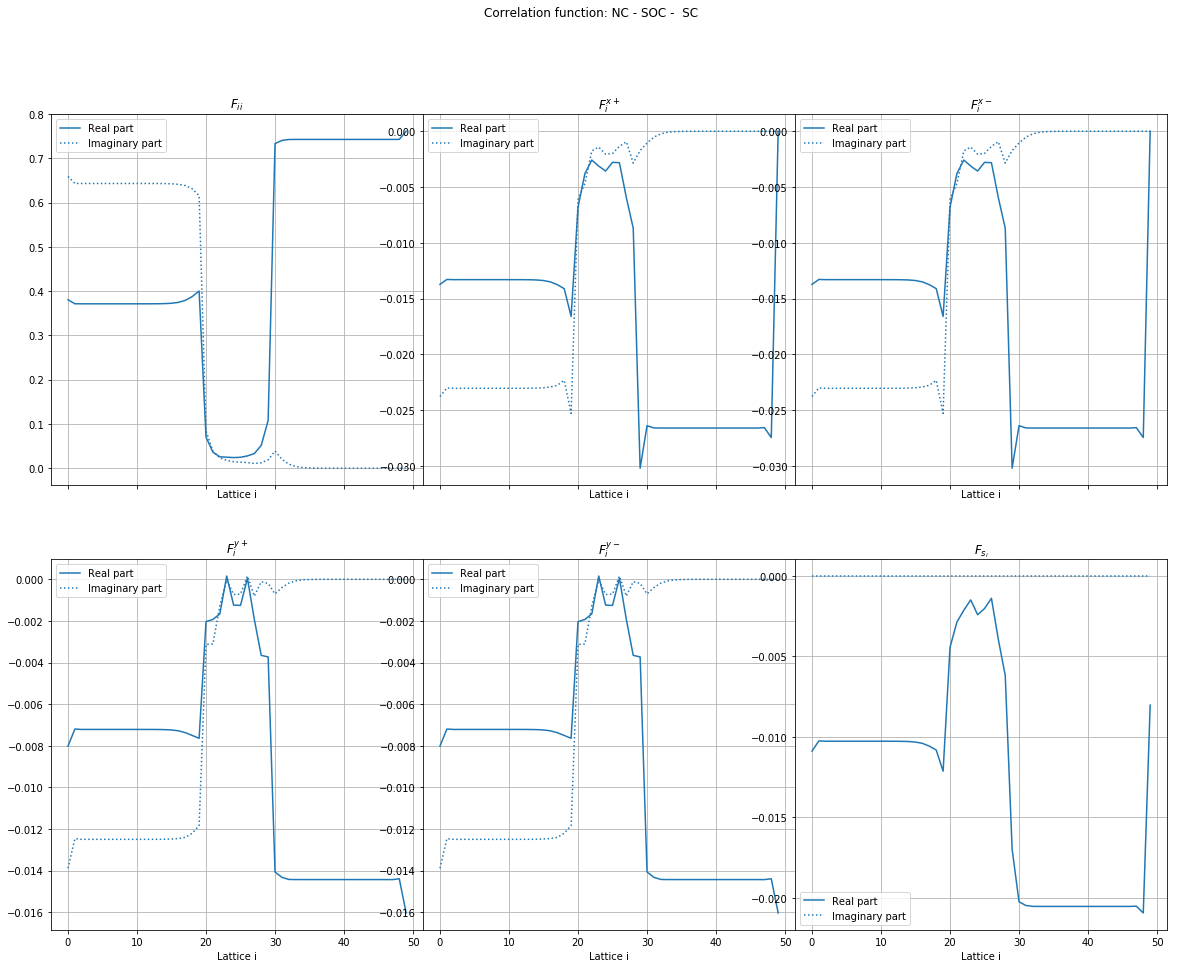

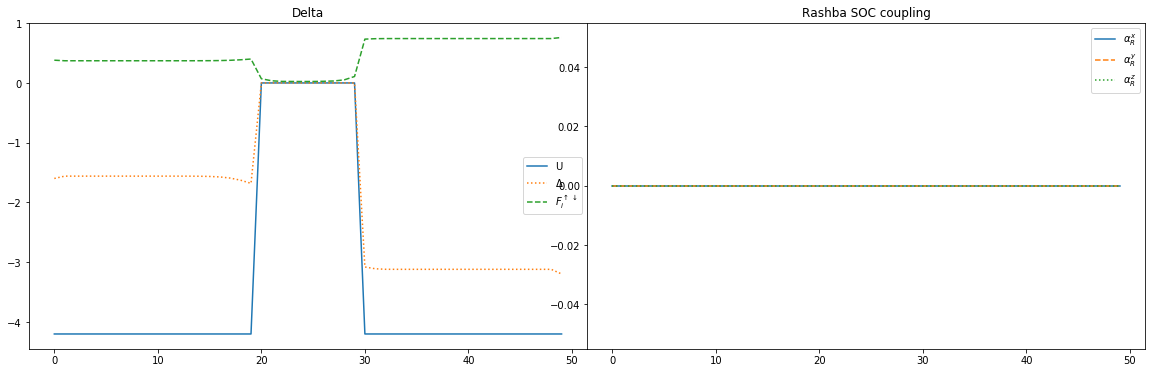

In [4]:
plot_pairing_amplitude(system, system.F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

<h6>CURRENT

In [ ]:
#current = current_along_lattice(system)

# prøv denne og se om du fremdeles får en strøm om går hardt til null i sc
current = system.current_along_lattice()

In [ ]:
site_x = np.linspace(0, system.L_x-1, system.L_x-1)
#plt.plot(site_x, np.real(current), label="real")
plt.plot(site_x[1:], np.imag(current)[1:], label="current")
plt.legend()
plt.xlabel("lattice site [SC-NC-SC]/[5-5-5]")
plt.ylabel("current I_x")
plt.grid()
plt.savefig('current_sns_100itr_selffunction.png', dpi=200, bbox_inches='tight')
plt.show()

In [7]:
print(system.F_matrix[:,0])
print(np.real(np.exp(1.9j *np.pi/4)))

[0.3804682 +6.58990258e-01j 0.37126773+6.43054565e-01j
 0.37122996+6.42989157e-01j 0.37122516+6.42980838e-01j
 0.37122471+6.42980045e-01j 0.3712247 +6.42980030e-01j
 0.37122472+6.42980015e-01j 0.37122478+6.42979977e-01j
 0.37122501+6.42979845e-01j 0.37122581+6.42979385e-01j
 0.37122856+6.42977798e-01j 0.37123786+6.42972430e-01j
 0.37126835+6.42954824e-01j 0.37136426+6.42899430e-01j
 0.37164983+6.42734356e-01j 0.37244309+6.42274505e-01j
 0.37446397+6.41090938e-01j 0.37908054+6.38286986e-01j
 0.38754304+6.30981001e-01j 0.40003983+6.15565454e-01j
 0.07017847+8.40365118e-02j 0.03614805+3.84483416e-02j
 0.02573456+2.32157510e-02j 0.02484134+1.76440903e-02j
 0.0239721 +1.45867142e-02j 0.02461852+1.34670922e-02j
 0.0277009 +1.26911888e-02j 0.03297271+1.06789101e-02j
 0.05137127+1.20809594e-02j 0.10786699+1.87580824e-02j
 0.73311523+3.86619265e-02j 0.7402171 +2.01316168e-02j
 0.74231301+9.14988474e-03j 0.74243302+3.74984042e-03j
 0.74244758+1.40792071e-03j 0.74244919+4.91012082e-04j
 0.7424493

In [7]:
import sys
import numpy as np
sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import define_system, solve_and_test_small_system, solve_for_sns_system

#_________ Phase =  0.0 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  9.346251015168338
Iteration nr. 2
delta_diff =  2.4033404575024004
Iteration nr. 3
delta_diff =  0.524969998192576
Iteration nr. 4
delta_diff =  0.09959243154994299
Iteration nr. 5
delta_diff =  0.019506241352499988
Iteration nr. 6
delta_diff =  0.0040495936876225646
Iteration nr. 7
delta_diff =  0.0008525981718539562
Iteration nr. 8
delta_diff =  0.00017408275498308974
Iteration nr. 9
delta_diff =  3.28131374402395e-05
Iteration nr. 10
delta_diff =  5.151207007505356e-06
Iteration nr. 11
delta_diff =  4.081637610847445e-07


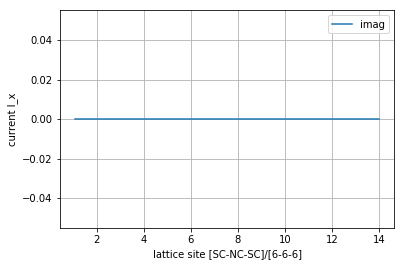

#_________ Phase =  0.10833078115826873 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  9.367232667379113
Iteration nr. 2
delta_diff =  2.4027697425918886
Iteration nr. 3
delta_diff =  0.5246802845222833
Iteration nr. 4
delta_diff =  0.09951010162876481
Iteration nr. 5
delta_diff =  0.01950466438580186
Iteration nr. 6
delta_diff =  0.004071738596887697
Iteration nr. 7
delta_diff =  0.0008805741039591429
Iteration nr. 8
delta_diff =  0.00020287214380545053
Iteration nr. 9
delta_diff =  6.108029656425178e-05
Iteration nr. 10
delta_diff =  3.2575220799855984e-05
Iteration nr. 11
delta_diff =  2.694289921513399e-05
Iteration nr. 12
delta_diff =  2.5519188336285936e-05
Iteration nr. 13
delta_diff =  2.4738772571670408e-05
Iteration nr. 14
delta_diff =  2.402432692033009e-05
Iteration nr. 15
delta_diff =  2.332048777720151e-05
Iteration nr. 16
delta_diff =  2.2637553061800686e-05
Iteration nr. 17
delta_diff =  2.1983627057040864e-05
Iteration nr. 18
delta_diff =  2.1361012471262214

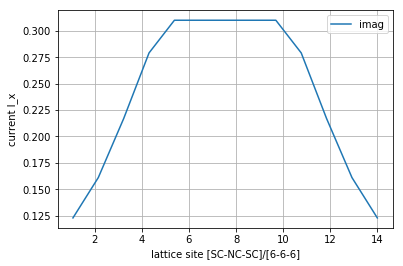

#_________ Phase =  0.21666156231653746 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  9.429662205350274
Iteration nr. 2
delta_diff =  2.401054906818772
Iteration nr. 3
delta_diff =  0.5238103780540907
Iteration nr. 4
delta_diff =  0.09926311698279582
Iteration nr. 5
delta_diff =  0.01950014519274229
Iteration nr. 6
delta_diff =  0.004138421465122399
Iteration nr. 7
delta_diff =  0.0009647504091685128
Iteration nr. 8
delta_diff =  0.0002894833191825561
Iteration nr. 9
delta_diff =  0.00014611893066183426
Iteration nr. 10
delta_diff =  0.0001150789495622852
Iteration nr. 11
delta_diff =  0.00010677368660998046
Iteration nr. 12
delta_diff =  0.0001027546090436162
Iteration nr. 13
delta_diff =  9.950634419854748e-05
Iteration nr. 14
delta_diff =  9.645707625699272e-05
Iteration nr. 15
delta_diff =  9.35455660073651e-05
Iteration nr. 16
delta_diff =  9.07737930439797e-05
Iteration nr. 17
delta_diff =  8.814147011005327e-05
Iteration nr. 18
delta_diff =  8.564302111146343e-05
Ite

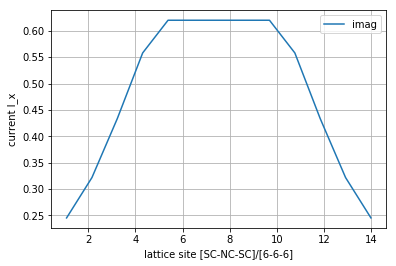

#_________ Phase =  0.3249923434748062 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  9.532029636416814
Iteration nr. 2
delta_diff =  2.3981879122091727
Iteration nr. 3
delta_diff =  0.5223579975660547
Iteration nr. 4
delta_diff =  0.09885149754535588
Iteration nr. 5
delta_diff =  0.019493320665142557
Iteration nr. 6
delta_diff =  0.004250387814112128
Iteration nr. 7
delta_diff =  0.001105873685550645
Iteration nr. 8
delta_diff =  0.00043464651609047473
Iteration nr. 9
delta_diff =  0.00028864188333680856
Iteration nr. 10
delta_diff =  0.0002533589880713415
Iteration nr. 11
delta_diff =  0.0002405819472764153
Iteration nr. 12
delta_diff =  0.00023222132234620521
Iteration nr. 13
delta_diff =  0.00022484481118635946
Iteration nr. 14
delta_diff =  0.0002178896790582023
Iteration nr. 15
delta_diff =  0.0002112848263541515
Iteration nr. 16
delta_diff =  0.00020501831723321404
Iteration nr. 17
delta_diff =  0.00019907583598663316
Iteration nr. 18
delta_diff =  0.00019343863827019

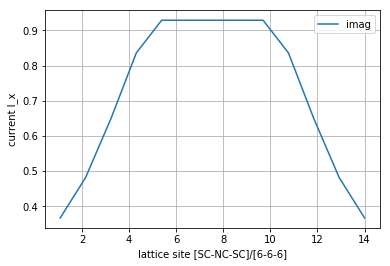

#_________ Phase =  0.43332312463307493 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  9.67193303690346
Iteration nr. 2
delta_diff =  2.3941554845853488
Iteration nr. 3
delta_diff =  0.5203193925465132
Iteration nr. 4
delta_diff =  0.09827529188221154
Iteration nr. 5
delta_diff =  0.019485258020697137
Iteration nr. 6
delta_diff =  0.004408883619434532
Iteration nr. 7
delta_diff =  0.001305191610001615
Iteration nr. 8
delta_diff =  0.000639582611904049
Iteration nr. 9
delta_diff =  0.0004898416177188688
Iteration nr. 10
delta_diff =  0.00044858126871725725
Iteration nr. 11
delta_diff =  0.0004295088284628488
Iteration nr. 12
delta_diff =  0.00041503704796884135
Iteration nr. 13
delta_diff =  0.00040184957558924296
Iteration nr. 14
delta_diff =  0.00038939618240286183
Iteration nr. 15
delta_diff =  0.00037759182636040955
Iteration nr. 16
delta_diff =  0.0003664049856114112
Iteration nr. 17
delta_diff =  0.00035580161843523666
Iteration nr. 18
delta_diff =  0.000345744470591387

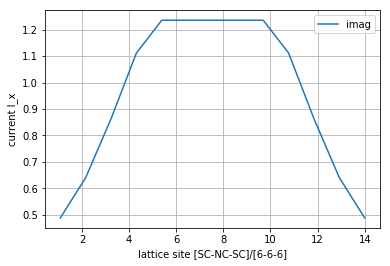

#_________ Phase =  0.5416539057913436 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  9.846230977659417
Iteration nr. 2
delta_diff =  2.388939316284621
Iteration nr. 3
delta_diff =  0.5176894241516604
Iteration nr. 4
delta_diff =  0.09753460048829937
Iteration nr. 5
delta_diff =  0.019477462775083856
Iteration nr. 6
delta_diff =  0.004615659629175836
Iteration nr. 7
delta_diff =  0.0015644571270716713
Iteration nr. 8
delta_diff =  0.0009060080885203651
Iteration nr. 9
delta_diff =  0.0007513961090681169
Iteration nr. 10
delta_diff =  0.0007023878510369908
Iteration nr. 11
delta_diff =  0.0006751628147132196
Iteration nr. 12
delta_diff =  0.0006527784889416354
Iteration nr. 13
delta_diff =  0.0006320670123144693
Iteration nr. 14
delta_diff =  0.0006124938900117001
Iteration nr. 15
delta_diff =  0.0005939559278712345
Iteration nr. 16
delta_diff =  0.0005763962525025554
Iteration nr. 17
delta_diff =  0.0005597553207975501
Iteration nr. 18
delta_diff =  0.0005439719602288212
Ite

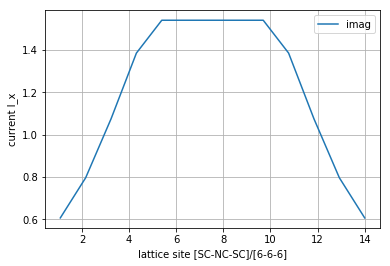

#_________ Phase =  0.6499846869496124 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  10.051222381255265
Iteration nr. 2
delta_diff =  2.382516390238678
Iteration nr. 3
delta_diff =  0.514461686201794
Iteration nr. 4
delta_diff =  0.09662960903831079
Iteration nr. 5
delta_diff =  0.019471888561635647
Iteration nr. 6
delta_diff =  0.00487297558164515
Iteration nr. 7
delta_diff =  0.0018859324945806897
Iteration nr. 8
delta_diff =  0.001236140294422318
Iteration nr. 9
delta_diff =  0.001075475563999892
Iteration nr. 10
delta_diff =  0.0010169050466513868
Iteration nr. 11
delta_diff =  0.0009796291447803098
Iteration nr. 12
delta_diff =  0.0009474919206287445
Iteration nr. 13
delta_diff =  0.0009175061193108148
Iteration nr. 14
delta_diff =  0.0008891559721002639
Iteration nr. 15
delta_diff =  0.0008623157749931489
Iteration nr. 16
delta_diff =  0.0008368974296647766
Iteration nr. 17
delta_diff =  0.0008128100291283537
Iteration nr. 18
delta_diff =  0.000789962999562848
Iterati

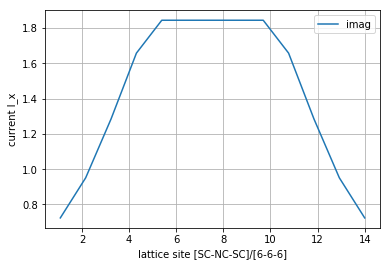

#_________ Phase =  0.7583154681078811 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  10.282831269833833
Iteration nr. 2
delta_diff =  2.374859471003406
Iteration nr. 3
delta_diff =  0.5106286746774922
Iteration nr. 4
delta_diff =  0.09556063242714659
Iteration nr. 5
delta_diff =  0.019470947229535285
Iteration nr. 6
delta_diff =  0.005183602121884631
Iteration nr. 7
delta_diff =  0.0022723909705446217
Iteration nr. 8
delta_diff =  0.0016327009360709661
Iteration nr. 9
delta_diff =  0.0014647480702272015
Iteration nr. 10
delta_diff =  0.0013947511552609595
Iteration nr. 11
delta_diff =  0.0013454794697737357
Iteration nr. 12
delta_diff =  0.0013017045998749911
Iteration nr. 13
delta_diff =  0.001260651517223005
Iteration nr. 14
delta_diff =  0.0012218259096356458
Iteration nr. 15
delta_diff =  0.0011850750506757378
Iteration nr. 16
delta_diff =  0.0011502736353732215
Iteration nr. 17
delta_diff =  0.0011172934447793972
Iteration nr. 18
delta_diff =  0.0010860089484868577
Ite

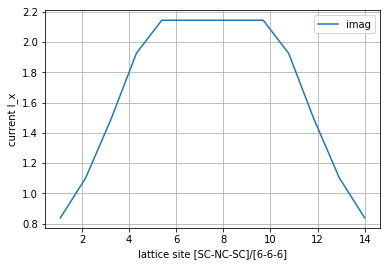

#_________ Phase =  0.8666462492661499 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  10.53677810873746
Iteration nr. 2
delta_diff =  2.3659378296140137
Iteration nr. 3
delta_diff =  0.5061820179526435
Iteration nr. 4
delta_diff =  0.09432817105376143
Iteration nr. 5
delta_diff =  0.019477516844144414
Iteration nr. 6
delta_diff =  0.0055508169774396085
Iteration nr. 7
delta_diff =  0.002727112639719018
Iteration nr. 8
delta_diff =  0.002098914499571259
Iteration nr. 9
delta_diff =  0.0019223811327162682
Iteration nr. 10
delta_diff =  0.001839041020610664
Iteration nr. 11
delta_diff =  0.001775779201975619
Iteration nr. 12
delta_diff =  0.0017184346670162981
Iteration nr. 13
delta_diff =  0.0016644756802687765
Iteration nr. 14
delta_diff =  0.0016134318496633991
Iteration nr. 15
delta_diff =  0.0015651187705324006
Iteration nr. 16
delta_diff =  0.0015193678579584122
Iteration nr. 17
delta_diff =  0.001476007564291195
Iteration nr. 18
delta_diff =  0.001434871790799446
Iterati

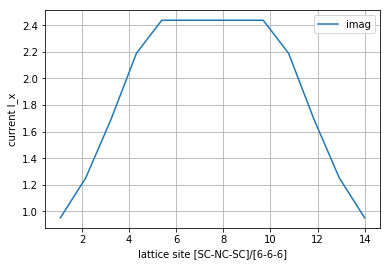

#_________ Phase =  0.9749770304244186 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  10.80872592887079
Iteration nr. 2
delta_diff =  2.35571829782976
Iteration nr. 3
delta_diff =  0.5011127852466389
Iteration nr. 4
delta_diff =  0.09293298189800328
Iteration nr. 5
delta_diff =  0.01949494406544946
Iteration nr. 6
delta_diff =  0.0059783901051872375
Iteration nr. 7
delta_diff =  0.003253868928711894
Iteration nr. 8
delta_diff =  0.0026384964240567612
Iteration nr. 9
delta_diff =  0.002452034282123509
Iteration nr. 10
delta_diff =  0.0023533829598771554
Iteration nr. 11
delta_diff =  0.002274088456104765
Iteration nr. 12
delta_diff =  0.00220119577008045
Iteration nr. 13
delta_diff =  0.0021324469338813525
Iteration nr. 14
delta_diff =  0.0020673976927998473
Iteration nr. 15
delta_diff =  0.0020058272027719403
Iteration nr. 16
delta_diff =  0.001947517473806481
Iteration nr. 17
delta_diff =  0.001892247581937723
Iteration nr. 18
delta_diff =  0.0018398052265123483
Iteration n

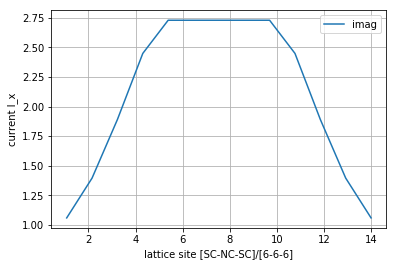

#_________ Phase =  1.0833078115826873 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  11.094395956257076
Iteration nr. 2
delta_diff =  2.344166786513899
Iteration nr. 3
delta_diff =  0.49541189853754614
Iteration nr. 4
delta_diff =  0.09137616891027595
Iteration nr. 5
delta_diff =  0.019527035730815007
Iteration nr. 6
delta_diff =  0.006470549711199043
Iteration nr. 7
delta_diff =  0.0038568873598260893
Iteration nr. 8
delta_diff =  0.003255622934415711
Iteration nr. 9
delta_diff =  0.0030578351777272137
Iteration nr. 10
delta_diff =  0.0029418610156254437
Iteration nr. 11
delta_diff =  0.0028444500374904314
Iteration nr. 12
delta_diff =  0.002753990340209146
Iteration nr. 13
delta_diff =  0.0026685275927807307
Iteration nr. 14
delta_diff =  0.0025876457047679224
Iteration nr. 15
delta_diff =  0.0025110825978920284
Iteration nr. 16
delta_diff =  0.0024385647714695465
Iteration nr. 17
delta_diff =  0.002369815912652723
Iteration nr. 18
delta_diff =  0.00230457192317509
Iterat

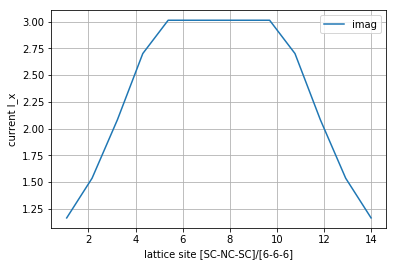

#_________ Phase =  1.191638592740956 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  11.38965267648968
Iteration nr. 2
delta_diff =  2.3312504566382857
Iteration nr. 3
delta_diff =  0.4890706853340223
Iteration nr. 4
delta_diff =  0.08965930078407942
Iteration nr. 5
delta_diff =  0.019578032067879815
Iteration nr. 6
delta_diff =  0.007031916736217577
Iteration nr. 7
delta_diff =  0.004540783436023053
Iteration nr. 8
delta_diff =  0.003954869881424025
Iteration nr. 9
delta_diff =  0.0037443272778340197
Iteration nr. 10
delta_diff =  0.003608991359296566
Iteration nr. 11
delta_diff =  0.003491354033306223
Iteration nr. 12
delta_diff =  0.0033812817625626596
Iteration nr. 13
delta_diff =  0.0032771531314825793
Iteration nr. 14
delta_diff =  0.0031785821520707463
Iteration nr. 15
delta_diff =  0.0030852608012086023
Iteration nr. 16
delta_diff =  0.0029968540946760207
Iteration nr. 17
delta_diff =  0.002913024457161278
Iteration nr. 18
delta_diff =  0.0028334505291824214
Iteratio

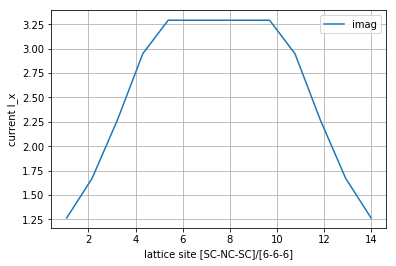

#_________ Phase =  1.2999693738992248 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  11.690561593074333
Iteration nr. 2
delta_diff =  2.3169408050431466
Iteration nr. 3
delta_diff =  0.482081629723526
Iteration nr. 4
delta_diff =  0.08778457054446741
Iteration nr. 5
delta_diff =  0.019652550452762867
Iteration nr. 6
delta_diff =  0.007667388729058579
Iteration nr. 7
delta_diff =  0.005310439264122735
Iteration nr. 8
delta_diff =  0.00474110076098446
Iteration nr. 9
delta_diff =  0.004516370263435658
Iteration nr. 10
delta_diff =  0.00435963511333046
Iteration nr. 11
delta_diff =  0.004219662324719148
Iteration nr. 12
delta_diff =  0.004087929757482562
Iteration nr. 13
delta_diff =  0.003963177643346838
Iteration nr. 14
delta_diff =  0.003845052106998886
Iteration nr. 15
delta_diff =  0.003733194732460682
Iteration nr. 16
delta_diff =  0.0036272033817174006
Iteration nr. 17
delta_diff =  0.0035266736374250252
Iteration nr. 18
delta_diff =  0.003431221686969965
Iteration nr. 

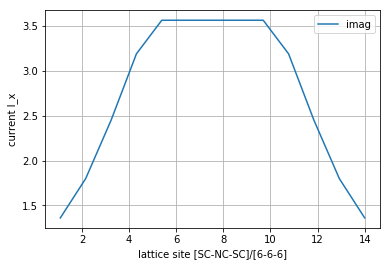

#_________ Phase =  1.4083001550574936 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  11.993424537401967
Iteration nr. 2
delta_diff =  2.3012180275676966
Iteration nr. 3
delta_diff =  0.4744394134591835
Iteration nr. 4
delta_diff =  0.0857550227085859
Iteration nr. 5
delta_diff =  0.019755483451473328
Iteration nr. 6
delta_diff =  0.008381943649492437
Iteration nr. 7
delta_diff =  0.006170797064091054
Iteration nr. 8
delta_diff =  0.005619272721428288
Iteration nr. 9
delta_diff =  0.005378963438707642
Iteration nr. 10
delta_diff =  0.0051988393595175835
Iteration nr. 11
delta_diff =  0.005034466300710534
Iteration nr. 12
delta_diff =  0.004879063697461496
Iteration nr. 13
delta_diff =  0.00473176168410023
Iteration nr. 14
delta_diff =  0.0045922408159535626
Iteration nr. 15
delta_diff =  0.004460088357458974
Iteration nr. 16
delta_diff =  0.004334829893701921
Iteration nr. 17
delta_diff =  0.00421598910271093
Iteration nr. 18
delta_diff =  0.004103115000213324
Iteration nr. 

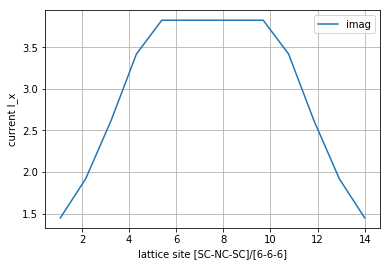

#_________ Phase =  1.5166309362157622 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  12.29479770696618
Iteration nr. 2
delta_diff =  2.284077158669789
Iteration nr. 3
delta_diff =  0.46614239962497694
Iteration nr. 4
delta_diff =  0.08357489374645807
Iteration nr. 5
delta_diff =  0.01989182720207729
Iteration nr. 6
delta_diff =  0.009180317897506738
Iteration nr. 7
delta_diff =  0.007126517610840663
Iteration nr. 8
delta_diff =  0.006594111304686723
Iteration nr. 9
delta_diff =  0.00633694480241129
Iteration nr. 10
delta_diff =  0.006131561219352727
Iteration nr. 11
delta_diff =  0.005940834830402162
Iteration nr. 12
delta_diff =  0.005759853002428535
Iteration nr. 13
delta_diff =  0.0055881636312852655
Iteration nr. 14
delta_diff =  0.0054254846563170705
Iteration nr. 15
delta_diff =  0.00527134597965889
Iteration nr. 16
delta_diff =  0.005125196677166463
Iteration nr. 17
delta_diff =  0.004986484290360406
Iteration nr. 18
delta_diff =  0.004854686701469058
Iteration nr. 1

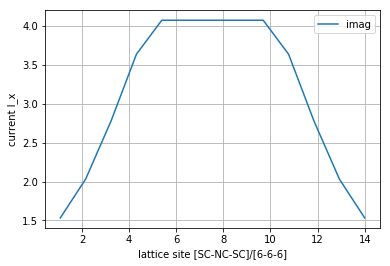

#_________ Phase =  1.624961717374031 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  12.59149714999331
Iteration nr. 2
delta_diff =  2.2655366720564496
Iteration nr. 3
delta_diff =  0.4571948213531739
Iteration nr. 4
delta_diff =  0.08125014642856848
Iteration nr. 5
delta_diff =  0.020066404718358
Iteration nr. 6
delta_diff =  0.010066487380004128
Iteration nr. 7
delta_diff =  0.008181424990760149
Iteration nr. 8
delta_diff =  0.007669575872312909
Iteration nr. 9
delta_diff =  0.007394490368931773
Iteration nr. 10
delta_diff =  0.007162202653652423
Iteration nr. 11
delta_diff =  0.006943383221682238
Iteration nr. 12
delta_diff =  0.006735108325700707
Iteration nr. 13
delta_diff =  0.0065373711356186475
Iteration nr. 14
delta_diff =  0.006349931000729779
Iteration nr. 15
delta_diff =  0.006172258797264706
Iteration nr. 16
delta_diff =  0.006003724222858676
Iteration nr. 17
delta_diff =  0.005843695713272801
Iteration nr. 18
delta_diff =  0.005691577204017189
Iteration nr. 19


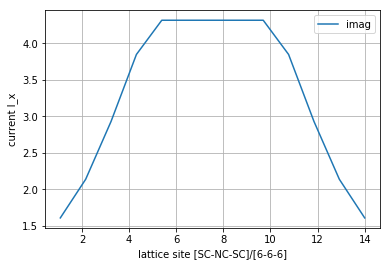

#_________ Phase =  1.7332924985322997 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  12.880595588454558
Iteration nr. 2
delta_diff =  2.2456504821084033
Iteration nr. 3
delta_diff =  0.44761013964203417
Iteration nr. 4
delta_diff =  0.07878933867998127
Iteration nr. 5
delta_diff =  0.02028343143864243
Iteration nr. 6
delta_diff =  0.011042840453177856
Iteration nr. 7
delta_diff =  0.00933761370721036
Iteration nr. 8
delta_diff =  0.008847991780754573
Iteration nr. 9
delta_diff =  0.008554293201714493
Iteration nr. 10
delta_diff =  0.008293839627505697
Iteration nr. 11
delta_diff =  0.008045551088157897
Iteration nr. 12
delta_diff =  0.007808605637999595
Iteration nr. 13
delta_diff =  0.007583468825138163
Iteration nr. 14
delta_diff =  0.007369947060828809
Iteration nr. 15
delta_diff =  0.007167452570584443
Iteration nr. 16
delta_diff =  0.006975274803775185
Iteration nr. 17
delta_diff =  0.006792701968462655
Iteration nr. 18
delta_diff =  0.0066190629192252205
Iteration nr.

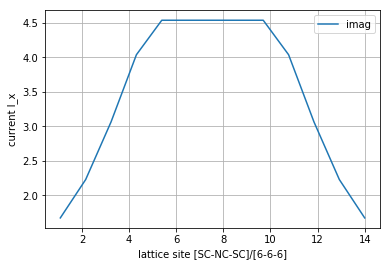

#_________ Phase =  1.8416232796905685 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  13.159413552459215
Iteration nr. 2
delta_diff =  2.2245246530856053
Iteration nr. 3
delta_diff =  0.43741640616431904
Iteration nr. 4
delta_diff =  0.07620506895358956
Iteration nr. 5
delta_diff =  0.020545844252726722
Iteration nr. 6
delta_diff =  0.012108869283057544
Iteration nr. 7
delta_diff =  0.010594022902059597
Iteration nr. 8
delta_diff =  0.010128652658784517
Iteration nr. 9
delta_diff =  0.009816229548338044
Iteration nr. 10
delta_diff =  0.0095269584389939
Iteration nr. 11
delta_diff =  0.009248407599904637
Iteration nr. 12
delta_diff =  0.008981957332650581
Iteration nr. 13
delta_diff =  0.00872857191851192
Iteration nr. 14
delta_diff =  0.008488112768870472
Iteration nr. 15
delta_diff =  0.008259936721575985
Iteration nr. 16
delta_diff =  0.008043254940463207
Iteration nr. 17
delta_diff =  0.007837276902815807
Iteration nr. 18
delta_diff =  0.007641257630982599
Iteration nr. 1

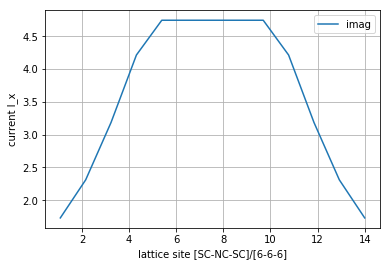

#_________ Phase =  1.9499540608488373 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  13.425506942944597
Iteration nr. 2
delta_diff =  2.202340703835957
Iteration nr. 3
delta_diff =  0.4266651514347551
Iteration nr. 4
delta_diff =  0.07351640597665299
Iteration nr. 5
delta_diff =  0.020854275670197327
Iteration nr. 6
delta_diff =  0.013259110725473167
Iteration nr. 7
delta_diff =  0.011944172397973633
Iteration nr. 8
delta_diff =  0.011505582723675113
Iteration nr. 9
delta_diff =  0.011175205892195814
Iteration nr. 10
delta_diff =  0.010857399264968563
Iteration nr. 11
delta_diff =  0.01054869104197601
Iteration nr. 12
delta_diff =  0.010252744293948816
Iteration nr. 13
delta_diff =  0.009971046714548312
Iteration nr. 14
delta_diff =  0.009703525642307753
Iteration nr. 15
delta_diff =  0.009449489721963656
Iteration nr. 16
delta_diff =  0.009208077680725908
Iteration nr. 17
delta_diff =  0.008978425365604016
Iteration nr. 18
delta_diff =  0.008759718501520677
Iteration nr. 1

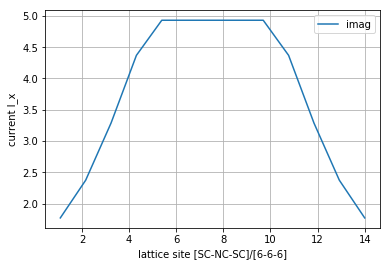

#_________ Phase =  2.058284842007106 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  13.676652419220325
Iteration nr. 2
delta_diff =  2.179388461134243
Iteration nr. 3
delta_diff =  0.41544656179020667
Iteration nr. 4
delta_diff =  0.07075296624504357
Iteration nr. 5
delta_diff =  0.02120549483342035
Iteration nr. 6
delta_diff =  0.014479927161204834
Iteration nr. 7
delta_diff =  0.0133725918275255
Iteration nr. 8
delta_diff =  0.012963978396618414
Iteration nr. 9
delta_diff =  0.012617707419017696
Iteration nr. 10
delta_diff =  0.012273032601996638
Iteration nr. 11
delta_diff =  0.01193561488954141
Iteration nr. 12
delta_diff =  0.011611448261291839
Iteration nr. 13
delta_diff =  0.011302564757840384
Iteration nr. 14
delta_diff =  0.011008972140684503
Iteration nr. 15
delta_diff =  0.010729943169905947
Iteration nr. 16
delta_diff =  0.01046455512271837
Iteration nr. 17
delta_diff =  0.010211880108350732
Iteration nr. 18
delta_diff =  0.00997104347440777
Iteration nr. 19
del

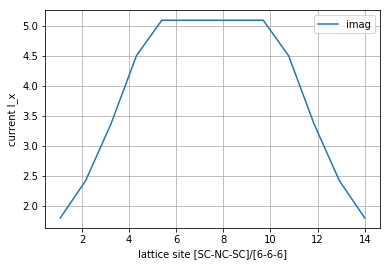

#_________ Phase =  2.1666156231653746 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  13.91083145148751
Iteration nr. 2
delta_diff =  2.156113714389824
Iteration nr. 3
delta_diff =  0.40391589099459413
Iteration nr. 4
delta_diff =  0.06796164797126984
Iteration nr. 5
delta_diff =  0.021590047125196653
Iteration nr. 6
delta_diff =  0.015744528039561403
Iteration nr. 7
delta_diff =  0.014849252260550063
Iteration nr. 8
delta_diff =  0.014474611873138761
Iteration nr. 9
delta_diff =  0.014116322645636241
Iteration nr. 10
delta_diff =  0.013748441721322292
Iteration nr. 11
delta_diff =  0.013385714572872767
Iteration nr. 12
delta_diff =  0.013036461297351956
Iteration nr. 13
delta_diff =  0.012703271296699308
Iteration nr. 14
delta_diff =  0.01238625091195337
Iteration nr. 15
delta_diff =  0.012084655573149151
Iteration nr. 16
delta_diff =  0.011797518553353988
Iteration nr. 17
delta_diff =  0.011523864201074333
Iteration nr. 18
delta_diff =  0.011262772003737426
Iteration nr. 1

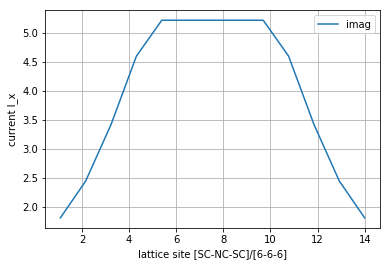

#_________ Phase =  2.2749464043236434 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.126213502031723
Iteration nr. 2
delta_diff =  2.1331915285415346
Iteration nr. 3
delta_diff =  0.39233959132483454
Iteration nr. 4
delta_diff =  0.06521733959650942
Iteration nr. 5
delta_diff =  0.02198869352888196
Iteration nr. 6
delta_diff =  0.017005433364178212
Iteration nr. 7
delta_diff =  0.016321075448679327
Iteration nr. 8
delta_diff =  0.0159852167646258
Iteration nr. 9
delta_diff =  0.015621231803650267
Iteration nr. 10
delta_diff =  0.015236575224007697
Iteration nr. 11
delta_diff =  0.014854680481674305
Iteration nr. 12
delta_diff =  0.014486102955188795
Iteration nr. 13
delta_diff =  0.014133986661125739
Iteration nr. 14
delta_diff =  0.013798557219387692
Iteration nr. 15
delta_diff =  0.013479078158636193
Iteration nr. 16
delta_diff =  0.013174563692625615
Iteration nr. 17
delta_diff =  0.01288401356800182
Iteration nr. 18
delta_diff =  0.012606482590139707
Iteration nr. 19

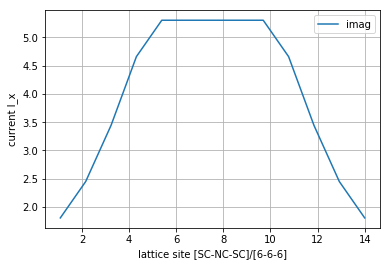

#_________ Phase =  2.383277185481912 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.3211386290767
Iteration nr. 2
delta_diff =  2.1116505262323506
Iteration nr. 3
delta_diff =  0.38117427846333185
Iteration nr. 4
delta_diff =  0.0626386268108949
Iteration nr. 5
delta_diff =  0.022367080468026223
Iteration nr. 6
delta_diff =  0.018183562279328394
Iteration nr. 7
delta_diff =  0.01769957737220147
Iteration nr. 8
delta_diff =  0.01740780868320027
Iteration nr. 9
delta_diff =  0.017047520849839973
Iteration nr. 10
delta_diff =  0.016656150377107104
Iteration nr. 11
delta_diff =  0.01626488489964233
Iteration nr. 12
delta_diff =  0.015886287078666534
Iteration nr. 13
delta_diff =  0.015524023287005792
Iteration nr. 14
delta_diff =  0.01517845807659685
Iteration nr. 15
delta_diff =  0.01484889457735838
Iteration nr. 16
delta_diff =  0.014534360375967025
Iteration nr. 17
delta_diff =  0.014233861185055168
Iteration nr. 18
delta_diff =  0.013946455276209385
Iteration nr. 19
delt

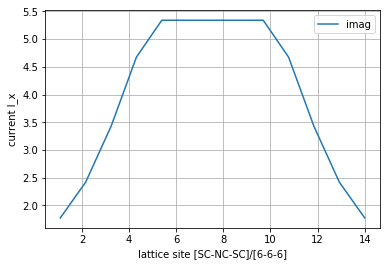

#_________ Phase =  2.491607966640181 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.49409987282753
Iteration nr. 2
delta_diff =  2.093110346130974
Iteration nr. 3
delta_diff =  0.37119335538823595
Iteration nr. 4
delta_diff =  0.06040675123401412
Iteration nr. 5
delta_diff =  0.02266793450410609
Iteration nr. 6
delta_diff =  0.019153949846904467
Iteration nr. 7
delta_diff =  0.018844687353554435
Iteration nr. 8
delta_diff =  0.01860181181017828
Iteration nr. 9
delta_diff =  0.018257977223973196
Iteration nr. 10
delta_diff =  0.017874248128393704
Iteration nr. 11
delta_diff =  0.017487839007319886
Iteration nr. 12
delta_diff =  0.017112882140065223
Iteration nr. 13
delta_diff =  0.016753482500845816
Iteration nr. 14
delta_diff =  0.016410154279417197
Iteration nr. 15
delta_diff =  0.01608227397875993
Iteration nr. 16
delta_diff =  0.01576892000683497
Iteration nr. 17
delta_diff =  0.015469140097577556
Iteration nr. 18
delta_diff =  0.01518202949738342
Iteration nr. 19
del

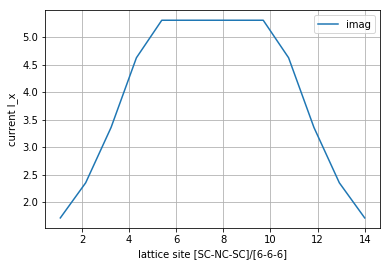

#_________ Phase =  2.5999387477984497 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.643725972544978
Iteration nr. 2
delta_diff =  2.0802789551486502
Iteration nr. 3
delta_diff =  0.3636568477476356
Iteration nr. 4
delta_diff =  0.058775775326014065
Iteration nr. 5
delta_diff =  0.02280039680835
Iteration nr. 6
delta_diff =  0.019731676342627374
Iteration nr. 7
delta_diff =  0.0195490692928467
Iteration nr. 8
delta_diff =  0.019357124349107933
Iteration nr. 9
delta_diff =  0.019045067215775542
Iteration nr. 10
delta_diff =  0.018687318496772395
Iteration nr. 11
delta_diff =  0.01832432002911442
Iteration nr. 12
delta_diff =  0.01797104202215659
Iteration nr. 13
delta_diff =  0.017631863141937036
Iteration nr. 14
delta_diff =  0.017307435181118574
Iteration nr. 15
delta_diff =  0.016997235248569446
Iteration nr. 16
delta_diff =  0.016700428120427685
Iteration nr. 17
delta_diff =  0.016416139147042957
Iteration nr. 18
delta_diff =  0.016143534130216547
Iteration nr. 19
del

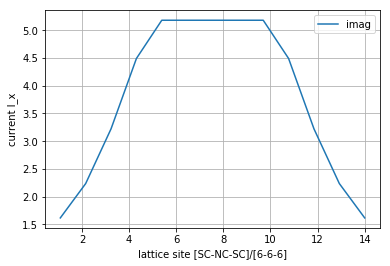

#_________ Phase =  2.7082695289567185 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.768764408711371
Iteration nr. 2
delta_diff =  2.0779831467279606
Iteration nr. 3
delta_diff =  0.3604214712570118
Iteration nr. 4
delta_diff =  0.058034273448883164
Iteration nr. 5
delta_diff =  0.02262882564741844
Iteration nr. 6
delta_diff =  0.01967272793433291
Iteration nr. 7
delta_diff =  0.019540472316605287
Iteration nr. 8
delta_diff =  0.019394742363722454
Iteration nr. 9
delta_diff =  0.019129063516100046
Iteration nr. 10
delta_diff =  0.018816718235953434
Iteration nr. 11
delta_diff =  0.018497398837800178
Iteration nr. 12
delta_diff =  0.01818584301863652
Iteration nr. 13
delta_diff =  0.01788643242502986
Iteration nr. 14
delta_diff =  0.017599904297917295
Iteration nr. 15
delta_diff =  0.01732584278919486
Iteration nr. 16
delta_diff =  0.017063520167068916
Iteration nr. 17
delta_diff =  0.016812163235767747
Iteration nr. 18
delta_diff =  0.0165710317024528
Iteration nr. 19
de

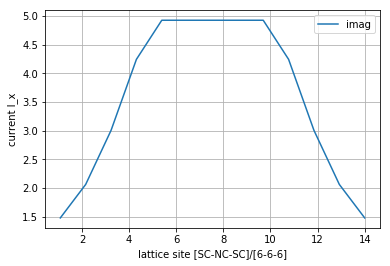

#_________ Phase =  2.8166003101149872 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.868060084999575
Iteration nr. 2
delta_diff =  2.094786339576943
Iteration nr. 3
delta_diff =  0.36358852873864217
Iteration nr. 4
delta_diff =  0.05833326180174227
Iteration nr. 5
delta_diff =  0.02197638857108535
Iteration nr. 6
delta_diff =  0.018731637704108815
Iteration nr. 7
delta_diff =  0.01855085642162402
Iteration nr. 8
delta_diff =  0.018435118041062938
Iteration nr. 9
delta_diff =  0.01822233262153201
Iteration nr. 10
delta_diff =  0.017968118522745068
Iteration nr. 11
delta_diff =  0.017706842055356112
Iteration nr. 12
delta_diff =  0.017451739454665292
Iteration nr. 13
delta_diff =  0.01720684322039879
Iteration nr. 14
delta_diff =  0.016972878385338723
Iteration nr. 15
delta_diff =  0.016749509412892875
Iteration nr. 16
delta_diff =  0.016536109345400042
Iteration nr. 17
delta_diff =  0.01633200555035933
Iteration nr. 18
delta_diff =  0.01613655256570459
Iteration nr. 19
de

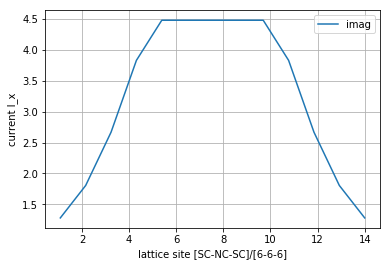

#_________ Phase =  2.9249310912732556 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.940508273731226
Iteration nr. 2
delta_diff =  2.142342146589896
Iteration nr. 3
delta_diff =  0.37382829367418213
Iteration nr. 4
delta_diff =  0.059338068062118096
Iteration nr. 5
delta_diff =  0.020707297446587804
Iteration nr. 6
delta_diff =  0.016858859957732692
Iteration nr. 7
delta_diff =  0.016542623622313072
Iteration nr. 8
delta_diff =  0.01642905680239046
Iteration nr. 9
delta_diff =  0.016257919755341837
Iteration nr. 10
delta_diff =  0.016055662673633044
Iteration nr. 11
delta_diff =  0.01584811688891522
Iteration nr. 12
delta_diff =  0.015646096535789012
Iteration nr. 13
delta_diff =  0.015453003626880471
Iteration nr. 14
delta_diff =  0.015269450491467879
Iteration nr. 15
delta_diff =  0.015095134132108931
Iteration nr. 16
delta_diff =  0.014929497283977577
Iteration nr. 17
delta_diff =  0.014771943181803323
Iteration nr. 18
delta_diff =  0.014621899787010124
Iteration nr. 

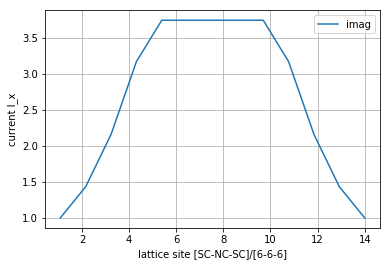

#_________ Phase =  3.0332618724315243 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  14.984934554608714
Iteration nr. 2
delta_diff =  2.218279481931941
Iteration nr. 3
delta_diff =  0.38722076205164335
Iteration nr. 4
delta_diff =  0.060172632838362175
Iteration nr. 5
delta_diff =  0.01905690015012646
Iteration nr. 6
delta_diff =  0.01459896550046529
Iteration nr. 7
delta_diff =  0.014130767585660384
Iteration nr. 8
delta_diff =  0.01399342186513144
Iteration nr. 9
delta_diff =  0.013835157973433671
Iteration nr. 10
delta_diff =  0.013655792165805631
Iteration nr. 11
delta_diff =  0.013473396011504152
Iteration nr. 12
delta_diff =  0.013296564562559466
Iteration nr. 13
delta_diff =  0.013128101192617222
Iteration nr. 14
delta_diff =  0.012968489409802655
Iteration nr. 15
delta_diff =  0.012817431087047608
Iteration nr. 16
delta_diff =  0.01267440985772946
Iteration nr. 17
delta_diff =  0.012538877712783154
Iteration nr. 18
delta_diff =  0.012410311226016432
Iteration nr. 19

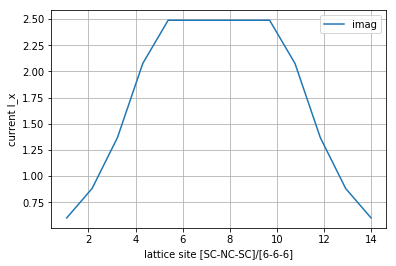

#_________ Phase =  3.141592653589793 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  15.0
Iteration nr. 2
delta_diff =  89.51066386244348
Iteration nr. 3
delta_diff =  0.5847026427143122
Iteration nr. 4
delta_diff =  0.43931951062416
Iteration nr. 5
delta_diff =  0.9662114569192596
Iteration nr. 6
delta_diff =  56.161184524882046
Iteration nr. 7
delta_diff =  0.18924445661495937
Iteration nr. 8
delta_diff =  0.3527921802584499
Iteration nr. 9
delta_diff =  0.10771039637745765
Iteration nr. 10
delta_diff =  0.4133634067739396
Iteration nr. 11
delta_diff =  0.8541329129598733
Iteration nr. 12
delta_diff =  0.48978467262544234
Iteration nr. 13
delta_diff =  0.21269374147687586
Iteration nr. 14
delta_diff =  0.043241657103758074
Iteration nr. 15
delta_diff =  0.7806809200736952
Iteration nr. 16
delta_diff =  0.007053721033974863
Iteration nr. 17
delta_diff =  0.26808374663703344
Iteration nr. 18
delta_diff =  0.0011180865928838459
Iteration nr. 19
delta_diff =  0.304038658476959

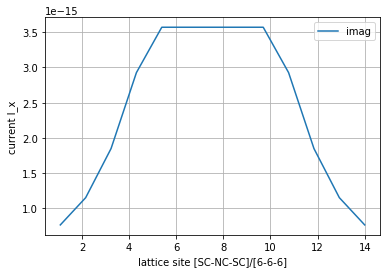

In [8]:
current_for_phase, phase_arr = solve_for_sns_system()

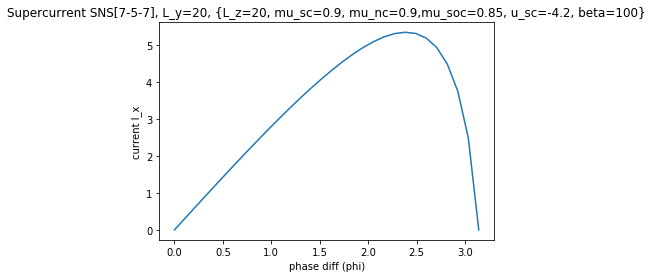

In [12]:
plt.plot(phase_arr, current_for_phase)
plt.xlabel("phase diff (phi)")
plt.ylabel("current I_x")
plt.title("Supercurrent SNS[7-5-7], L_y=20, {L_z=20, mu_sc=0.9, mu_nc=0.9,mu_soc=0.85, u_sc=-4.2, beta=100}")
plt.savefig('current_sns_phase_change_100itr.png', dpi=200, bbox_inches='tight')
plt.show()


In [10]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_for_sfs_system

#_________ L_f =  0 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  12.413856091581644
Iteration nr. 2
delta_diff =  4.152456193212104
Iteration nr. 3
delta_diff =  1.1430478316321109
Iteration nr. 4
delta_diff =  0.293616696523942
Iteration nr. 5
delta_diff =  0.07328028794894632
Iteration nr. 6
delta_diff =  0.017569605874572986
Iteration nr. 7
delta_diff =  0.003626637437581622
Iteration nr. 8
delta_diff =  0.00019490118123017714


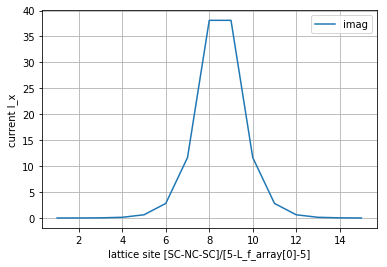

#_________ L_f =  1 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  24.153991203019956
Iteration nr. 2
delta_diff =  6.430091016468052
Iteration nr. 3
delta_diff =  3.667429001632088
Iteration nr. 4
delta_diff =  0.7877518497612851
Iteration nr. 5
delta_diff =  0.1719430515217632
Iteration nr. 6
delta_diff =  0.04080997612131507
Iteration nr. 7
delta_diff =  0.009889667709825715
Iteration nr. 8
delta_diff =  0.0023735014322651274
Iteration nr. 9
delta_diff =  0.0005318450224953417


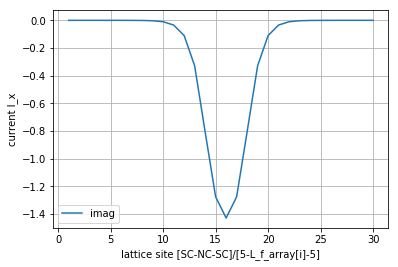

#_________ L_f =  2 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  25.09343090754653
Iteration nr. 2
delta_diff =  7.853920137088177
Iteration nr. 3
delta_diff =  2.1779934876206988
Iteration nr. 4
delta_diff =  0.5355438624033035
Iteration nr. 5
delta_diff =  0.13235427176378065
Iteration nr. 6
delta_diff =  0.03314539817109316
Iteration nr. 7
delta_diff =  0.008959154284734126
Iteration nr. 8
delta_diff =  0.003052233871846669
Iteration nr. 9
delta_diff =  0.0015962729458990237
Iteration nr. 10
delta_diff =  0.001225119231733371
Iteration nr. 11
delta_diff =  0.0011190325369732396


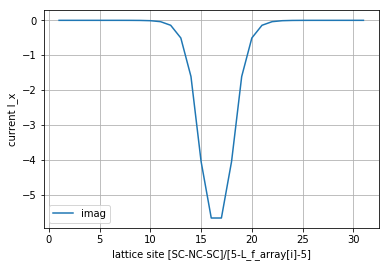

#_________ L_f =  3 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  26.031905523829945
Iteration nr. 2
delta_diff =  8.385142836136025
Iteration nr. 3
delta_diff =  2.1066581982198125
Iteration nr. 4
delta_diff =  0.49573744309457163
Iteration nr. 5
delta_diff =  0.11829007954136322
Iteration nr. 6
delta_diff =  0.029414172520515616
Iteration nr. 7
delta_diff =  0.008132073299570062
Iteration nr. 8
delta_diff =  0.00298074643710546
Iteration nr. 9
delta_diff =  0.0017132453127782928
Iteration nr. 10
delta_diff =  0.0013846319333444205
Iteration nr. 11
delta_diff =  0.0012840710335435255


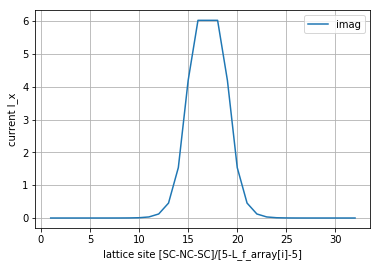

#_________ L_f =  4 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  26.983852794488474
Iteration nr. 2
delta_diff =  8.336178963742531
Iteration nr. 3
delta_diff =  1.976203603429052
Iteration nr. 4
delta_diff =  0.4476299967853157
Iteration nr. 5
delta_diff =  0.10385225032333346
Iteration nr. 6
delta_diff =  0.02461953820889952
Iteration nr. 7
delta_diff =  0.005879738537879587
Iteration nr. 8
delta_diff =  0.0014036952966745462
Iteration nr. 9
delta_diff =  0.00033110889131812476


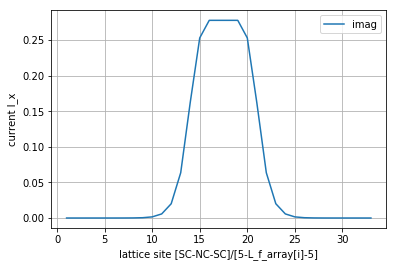

#_________ L_f =  5 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  27.938476468335033
Iteration nr. 2
delta_diff =  7.528088422856718
Iteration nr. 3
delta_diff =  1.706960232061956
Iteration nr. 4
delta_diff =  0.36915563593416484
Iteration nr. 5
delta_diff =  0.08142588447167437
Iteration nr. 6
delta_diff =  0.018925450213403153
Iteration nr. 7
delta_diff =  0.004680194901588847
Iteration nr. 8
delta_diff =  0.0013680665613271224
Iteration nr. 9
delta_diff =  0.0005904229889433851


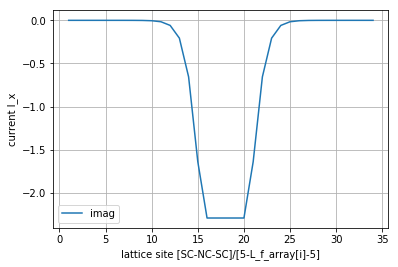

#_________ L_f =  6 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  28.89231177471548
Iteration nr. 2
delta_diff =  8.098631830062857
Iteration nr. 3
delta_diff =  1.8291150899061555
Iteration nr. 4
delta_diff =  0.37495533502277373
Iteration nr. 5
delta_diff =  0.08225883076377981
Iteration nr. 6
delta_diff =  0.019498727128583717
Iteration nr. 7
delta_diff =  0.005221370353303629
Iteration nr. 8
delta_diff =  0.001889879970166602
Iteration nr. 9
delta_diff =  0.0010967534743655354
Iteration nr. 10
delta_diff =  0.000897245239403741


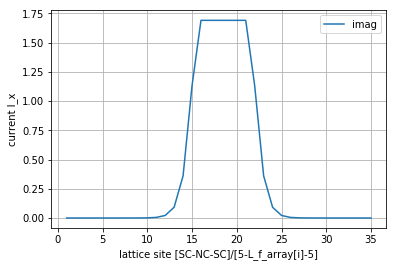

#_________ L_f =  7 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  29.850283329417888
Iteration nr. 2
delta_diff =  7.4230218632919485
Iteration nr. 3
delta_diff =  1.1884620350285797
Iteration nr. 4
delta_diff =  0.17850071977617016
Iteration nr. 5
delta_diff =  0.02838514246815248
Iteration nr. 6
delta_diff =  0.005310698627733767
Iteration nr. 7
delta_diff =  0.0014846067570522914
Iteration nr. 8
delta_diff =  0.0008564336946034613


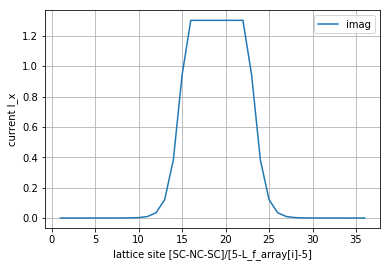

#_________ L_f =  8 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  30.814322734837774
Iteration nr. 2
delta_diff =  7.290991466918777
Iteration nr. 3
delta_diff =  1.3629485241911616
Iteration nr. 4
delta_diff =  0.20705478806435684
Iteration nr. 5
delta_diff =  0.03394346029896422
Iteration nr. 6
delta_diff =  0.006622967329663558
Iteration nr. 7
delta_diff =  0.001816179891499306
Iteration nr. 8
delta_diff =  0.0009437809920034806


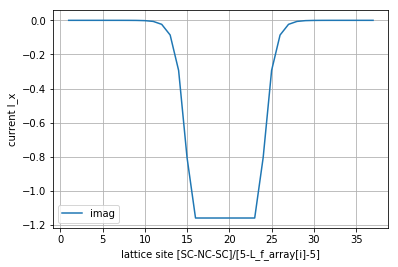

#_________ L_f =  9 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  31.777912995814344
Iteration nr. 2
delta_diff =  7.492357743782989
Iteration nr. 3
delta_diff =  1.350939818502889
Iteration nr. 4
delta_diff =  0.18400103788388422
Iteration nr. 5
delta_diff =  0.026734085735822463
Iteration nr. 6
delta_diff =  0.004249263967660888
Iteration nr. 7
delta_diff =  0.0006759307013862805


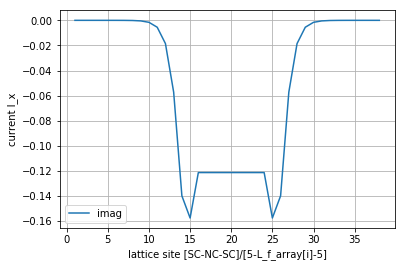

#_________ L_f =  10 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  32.74207142114335
Iteration nr. 2
delta_diff =  7.6480906493593865
Iteration nr. 3
delta_diff =  1.4853651290418242
Iteration nr. 4
delta_diff =  0.25013249906060253
Iteration nr. 5
delta_diff =  0.04641131632425912
Iteration nr. 6
delta_diff =  0.010200127779439771
Iteration nr. 7
delta_diff =  0.003032764174712405
Iteration nr. 8
delta_diff =  0.0015421812598441812
Iteration nr. 9
delta_diff =  0.0012183972594314236
Iteration nr. 10
delta_diff =  0.0011355178034128657
Iteration nr. 11
delta_diff =  0.0011019278048114678


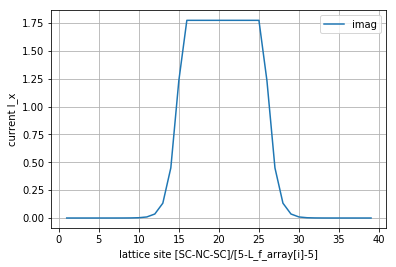

#_________ L_f =  11 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  33.71035475067056
Iteration nr. 2
delta_diff =  5.419662639097869
Iteration nr. 3
delta_diff =  0.03723692689714768
Iteration nr. 4
delta_diff =  0.4612003532936141
Iteration nr. 5
delta_diff =  0.17801322847334777
Iteration nr. 6
delta_diff =  0.05130520962026046
Iteration nr. 7
delta_diff =  0.01368581845550508
Iteration nr. 8
delta_diff =  0.003481997469599234
Iteration nr. 9
delta_diff =  0.0007835260059482458


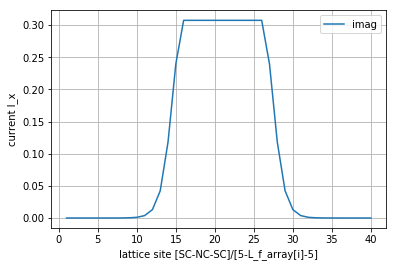

#_________ L_f =  12 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  34.68158736166466
Iteration nr. 2
delta_diff =  6.3451421528584095
Iteration nr. 3
delta_diff =  0.7344070052410198
Iteration nr. 4
delta_diff =  0.012165943950229458
Iteration nr. 5
delta_diff =  0.027955987231021016
Iteration nr. 6
delta_diff =  0.00975717971927311
Iteration nr. 7
delta_diff =  0.0025163859565153694
Iteration nr. 8
delta_diff =  0.00028077196157863586


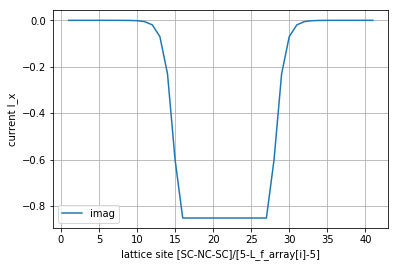

#_________ L_f =  13 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  35.65268955294394
Iteration nr. 2
delta_diff =  6.9859888732528885
Iteration nr. 3
delta_diff =  0.5759001412681691
Iteration nr. 4
delta_diff =  0.09569739099293512
Iteration nr. 5
delta_diff =  0.053495833598193064
Iteration nr. 6
delta_diff =  0.016905285549844478
Iteration nr. 7
delta_diff =  0.004688522185506842
Iteration nr. 8
delta_diff =  0.0011566985145915678
Iteration nr. 9
delta_diff =  0.00017975469119591215


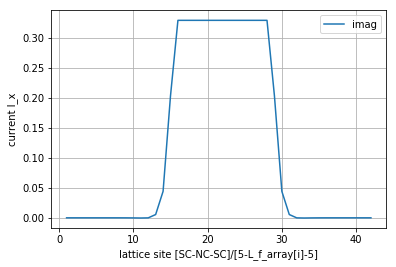

#_________ L_f =  14 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  36.62438137585973
Iteration nr. 2
delta_diff =  6.573431715016665
Iteration nr. 3
delta_diff =  0.5530574659968847
Iteration nr. 4
delta_diff =  0.12383507713757466
Iteration nr. 5
delta_diff =  0.06312191390931748
Iteration nr. 6
delta_diff =  0.019267013377481768
Iteration nr. 7
delta_diff =  0.005024400087970417
Iteration nr. 8
delta_diff =  0.0009733566074927619


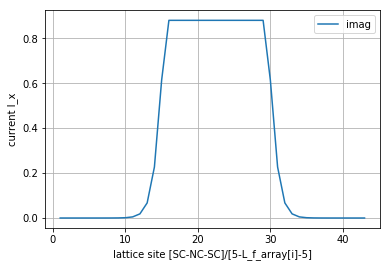

#_________ L_f =  15 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  37.600733915612636
Iteration nr. 2
delta_diff =  6.415530691698955
Iteration nr. 3
delta_diff =  0.2552205897358666
Iteration nr. 4
delta_diff =  0.2413415288135232
Iteration nr. 5
delta_diff =  0.09819078017083507
Iteration nr. 6
delta_diff =  0.02895771349979448
Iteration nr. 7
delta_diff =  0.007817240849006481
Iteration nr. 8
delta_diff =  0.0019541822249988863
Iteration nr. 9
delta_diff =  0.0003759701908299152


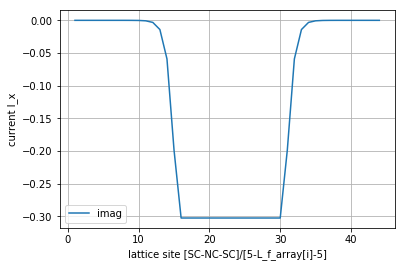

#_________ L_f =  16 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  38.5758686974412
Iteration nr. 2
delta_diff =  5.299370975292773
Iteration nr. 3
delta_diff =  0.06237035349468059
Iteration nr. 4
delta_diff =  0.3105102707090299
Iteration nr. 5
delta_diff =  0.11393862594508825
Iteration nr. 6
delta_diff =  0.032620433361656785
Iteration nr. 7
delta_diff =  0.00858782618325872
Iteration nr. 8
delta_diff =  0.002018769325482492
Iteration nr. 9
delta_diff =  0.00026770708230464374


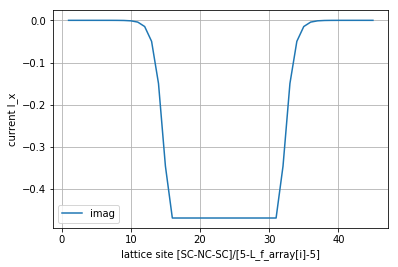

#_________ L_f =  17 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  39.55266023120789
Iteration nr. 2
delta_diff =  6.471092837371743
Iteration nr. 3
delta_diff =  0.41591852220499226
Iteration nr. 4
delta_diff =  0.17784568092896896
Iteration nr. 5
delta_diff =  0.07938374621034797
Iteration nr. 6
delta_diff =  0.02363573922574272
Iteration nr. 7
delta_diff =  0.006106017934974977
Iteration nr. 8
delta_diff =  0.001184281683252979
Iteration nr. 9
delta_diff =  0.00014599754160304524


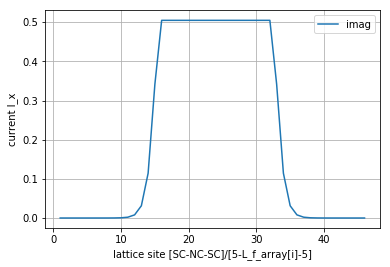

#_________ L_f =  18 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  40.530101851053274
Iteration nr. 2
delta_diff =  5.12214932911101
Iteration nr. 3
delta_diff =  0.4303448949392105
Iteration nr. 4
delta_diff =  0.45695198097249673
Iteration nr. 5
delta_diff =  0.1566106104934671
Iteration nr. 6
delta_diff =  0.04409317468075531
Iteration nr. 7
delta_diff =  0.011679851350215244
Iteration nr. 8
delta_diff =  0.0029277617609253766
Iteration nr. 9
delta_diff =  0.0006120756256998418


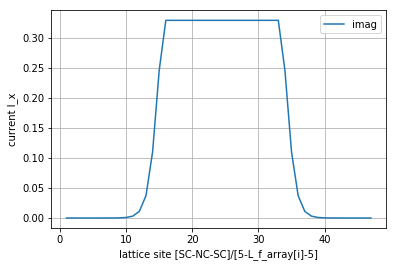

#_________ L_f =  19 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  41.510112120375226
Iteration nr. 2
delta_diff =  5.02014126133003
Iteration nr. 3
delta_diff =  0.3360884591771023
Iteration nr. 4
delta_diff =  0.4229364592897324
Iteration nr. 5
delta_diff =  0.1469924771763311
Iteration nr. 6
delta_diff =  0.04133873735510804
Iteration nr. 7
delta_diff =  0.01075394842487331
Iteration nr. 8
delta_diff =  0.00248510797732327
Iteration nr. 9
delta_diff =  0.00029982040746192045


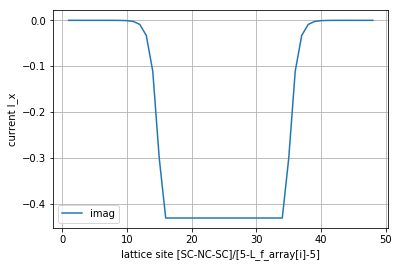

#_________ L_f =  20 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  42.49035332238422
Iteration nr. 2
delta_diff =  4.407868531762194
Iteration nr. 3
delta_diff =  0.9800456080014497
Iteration nr. 4
delta_diff =  0.6671294248431083
Iteration nr. 5
delta_diff =  0.218214132148589
Iteration nr. 6
delta_diff =  0.060654126914146934
Iteration nr. 7
delta_diff =  0.016127184426436632
Iteration nr. 8
delta_diff =  0.004224627485720075
Iteration nr. 9
delta_diff =  0.0010960231670149364
Iteration nr. 10
delta_diff =  0.00027910509699725705


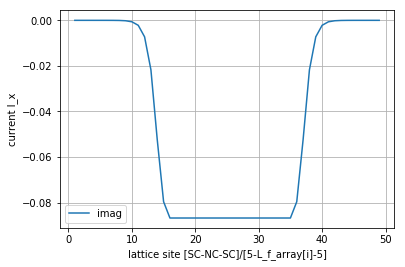

#_________ L_f =  21 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  43.47059687658659
Iteration nr. 2
delta_diff =  6.767805445131493
Iteration nr. 3
delta_diff =  0.05465817948898298
Iteration nr. 4
delta_diff =  0.34422929271978026
Iteration nr. 5
delta_diff =  0.1292237449773855
Iteration nr. 6
delta_diff =  0.03686575589470589
Iteration nr. 7
delta_diff =  0.009454537637282111
Iteration nr. 8
delta_diff =  0.0019723533070764277
Iteration nr. 9
delta_diff =  1.3270782881952835e-05


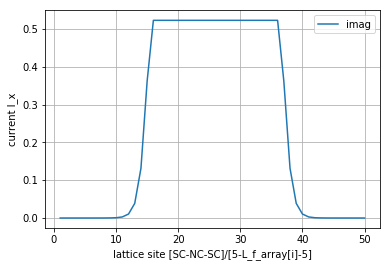

#_________ L_f =  22 _________#
Hermition:  True
Iteration nr. 1
delta_diff =  44.452059555343354
Iteration nr. 2
delta_diff =  4.6872915699809825
Iteration nr. 3
delta_diff =  0.939325766855932
Iteration nr. 4
delta_diff =  0.6419963654369518
Iteration nr. 5
delta_diff =  0.21004331412549704
Iteration nr. 6
delta_diff =  0.05839186076654172
Iteration nr. 7
delta_diff =  0.015530578796826254
Iteration nr. 8
delta_diff =  0.004073350316477614
Iteration nr. 9


KeyboardInterrupt: 

In [11]:
current_for_L_f, L_f_arr = solve_for_sfs_system()

In [ ]:
plt.plot(L_f_arr, current_for_L_f)
plt.xlabel("Thickness of ferromagnet [L]")
plt.ylabel("current I_x")
plt.title("Supercurrent SFS[15-L-15], {L_y=30, L_z=30, mu_sc=0.9, mu_nc=0.9,mu_soc=0.85, u_sc=-4.2, h=[0,1.5,0], beta=100}")
plt.savefig('current_sfs_L_change_hz=1_5.png', dpi=200, bbox_inches='tight')
plt.show()

<h5> Phase Diagram for Free energy

In [15]:
def calculate_systems(max_iter=100, 
                      beta=30,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3):
    """
    Calculate the energy for SC and SOC systems at a beta.
    """
    L_y = 85
    L_z = 85
    #NC
    nc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 5, L_sc = 0, L_soc=0)
    solve_system(nc_system, max_iter, tol_iter)
    
    # SOC
    soc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 0, L_soc=5)
    solve_system(soc_system, max_iter, tol_iter)
    
    # SC
    sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 5, L_soc=0)
    solve_system(sc_system, max_iter, tol_iter)
    
    energies_nc_soc_sc = np.array([nc_system.compute_energy(), soc_system.compute_energy(), sc_system.compute_energy()])
    return energies_nc_soc_sc

In [ ]:
#Try to compute phase diagram for beta

In [16]:
def pd_search_along_beta(min_beta = 200, max_beta=400, num_beta_step=5, tol=1e-3):
    es = np.zeros(shape=(num_beta_step, 3), dtype=np.float128)
    tps = ['P', 'SOC', 'SC']
    beta_array = np.linspace(min_beta, max_beta, num_beta_step)
    for i in range(num_beta_step):
        print("---- beta = ", beta_array[i], "-----")
        e = calculate_systems(beta=beta_array[i])
        es[i,:] = e[:] # es:soc energy, sc energy
    return es, beta_array

In [ ]:
e, b = pd_search_along_beta()

In [ ]:
plt.plot(b, e[:,0])
plt.plot(b, e[:,1])

In [ ]:
# Try to compute phase diagram for alpha

In [16]:
def pd_search_along_alpha_strength(alpha_max, L_nc = 50, L_soc = 2, L_sc = 50, theta = 0, xz = False, yz = False):
    alpha = np.ones((len(alpha_max), 3), dtype=np.float64)
    for i in range(len(alpha_max)):
        alpha[i] = alpha_max[i]*alpha[i,:]
        
    
    if(xz==True):
        alpha[:] = alpha[:]*np.array([np.sin(theta), 0*theta, np.cos(theta)]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha[:] = alpha[:]*np.array([0*theta, np.sin(theta), np.cos(theta)]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return

    free_energy = np.zeros(shape=(alpha.shape[0], 3), dtype=np.float128)
    tps = ['NC', 'SOC', 'SC']
    
    for i in range(alpha.shape[0]):
        print("---- alpha = ", alpha[i, :], "-----")
        e = calculate_systems(alpha_R_initial = alpha[i, :])
        free_energy[i,:] = e[:] # es:soc energy, sc energy
    return free_energy, alpha_max


In [17]:
alpha_max = np.linspace(0,3,20)
free_energy_alpha_strengt, alpha_max_array = pd_search_along_alpha_strength(alpha_max=alpha_max, xz=True)

---- alpha =  [0. 0. 0.] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:54: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  3.1442541925255076
Iteration nr. 2
delta_diff =  0.6522508580098595
Iteration nr. 3
delta_diff =  0.35053143837509837
Iteration nr. 4
delta_diff =  0.18572743980924367
Iteration nr. 5
delta_diff =  0.0976129654880262
Iteration nr. 6
delta_diff =  0.051075659381370916
Iteration nr. 7
delta_diff =  0.02666199432007235
Iteration nr. 8
delta_diff =  0.013900495913537751
Iteration nr. 9
delta_diff =  0.00724245475677852
Iteration nr. 10
delta_diff =  0.003772203833980835
Iteration nr. 11
delta_diff =  0.001964397557028525
Iteration nr. 12
delta_diff =  0.0010228816215142838
Iteration nr. 13
delta_diff =  0.0005326012674968757
---- alpha =  [0.         0.         0.15789474] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  

In [18]:
print(free_energy_alpha_strengt.shape)

(20, 3)


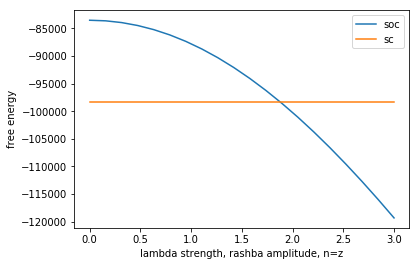

In [19]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(alpha_max_array, free_energy_alpha_strengt[:,0], label="nc")
plt.plot(alpha_max_array, free_energy_alpha_strengt[:,1], label="soc")
plt.plot(alpha_max_array, free_energy_alpha_strengt[:,2], label="sc")
plt.xlabel("lambda strength, rashba amplitude, n=z")
plt.ylabel("free energy")
plt.legend()
#plt.savefig('PD - free_energy_lambda_strength, n=z.png', dpi=200, bbox_inches='tight')
plt.show()

In [27]:
def pd_search_along_alpha_angle(alpha_max = 2, L_nc = 7, L_soc = 3, L_sc = 7, xz=False, yz=False):
    theta = np.linspace(0,np.pi/2,30)
    if(xz==True):
        alpha = alpha_max*np.array([np.sin(theta[:]), 0*theta[:], np.cos(theta[:])]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha = alpha_max*np.array([0*theta[:], np.sin(theta[:]), np.cos(theta[:])]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return
    
    free_energy = np.zeros(shape=(alpha.shape[1], 3), dtype=np.float128)
    tps = ['NC', 'SOC']
    
    for i in range(alpha.shape[1]):
        print("---- alpha = ", alpha[:,i], "-----")
        e = calculate_systems(alpha_R_initial = alpha[:,i])
        free_energy[i,:] = e[:] # es:soc energy, sc energy
    return free_energy, theta


In [31]:
#magnitude of alpha vector
alpha_max = 2.0

free_energy_angle_pd_xz, theta_array_pd_xz = pd_search_along_alpha_angle(alpha_max=alpha_max, xz=True)
free_energy_angle_pd_yz, theta_array_pd_yz = pd_search_along_alpha_angle(alpha_max=alpha_max, yz=True)

---- alpha =  [0. 0. 2.] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:54: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.1442541925255076
Iteration nr. 2
delta_diff =  0.6522508580098595
Iteration nr. 3
delta_diff =  0.35053143837509837
Iteration nr. 4
delta_diff =  0.18572743980924367
Iteration nr. 5
delta_diff =  0.0976129654880262
Iteration nr. 6
delta_diff =  0.051075659381370916
Iteration nr. 7
delta_diff =  0.02666199432007235
Iteration nr. 8
delta_diff =  0.013900495913537751
Iteration nr. 9
delta_diff =  0.00724245475677852
Iteration nr. 10
delta_diff =  0.003772203833980835
Iteration nr. 11
delta_diff =  0.001964397557028525
Iteration nr. 12
delta_diff =  0.0010228816215142838
Iteration nr. 13
delta_diff =  0.0005326012674968757
---- alpha =  [0.10827782 0.         1.99706683] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  

KeyboardInterrupt: 

In [ ]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(theta_array, free_energy_alpha_strengt[:,0], label="nc")
plt.plot(theta_array_pd_xz, free_energy_angle_pd_xz[:,1], label="soc")
plt.plot(theta_array_pd_xz, free_energy_angle_pd_xz[:,2], label="sc")
plt.xlabel("lambda angle, xz plane, rashba amplitude = 2.0")
plt.ylabel("free energy")
plt.legend()
#plt.savefig('PD - free_energy_lambda_angle_xz, strength=2.0.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# free_energy_alpha_strength, alpha_max_array
#plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,0], label="nc")
plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,1], label="soc")
plt.plot(theta_array_pd_yz, free_energy_angle_pd_yz[:,2], label="sc")
plt.xlabel("lambda angle, yz plane, rashba amplitude = 2.0")
plt.ylabel("free energy")
plt.legend()
#plt.savefig('PD - free_energy_lambda_angle_yz, strengt=2.0.png', dpi=200, bbox_inches='tight')
plt.show()

<h5> Free Energy diagram w.r.t. rashba alpha orientation

In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [2]:
#Free energy

def calculate_energy_of_system(max_iter=100, 
                      beta=33.3,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3,
                      L_nc = 50, L_soc = 2, L_sc = 50):
    """
    Calculate the energy for nc - soc - sc system at a given alpha.
    """
    L_y = 85#L_nc+L_soc+L_sc
    L_z = 85#L_nc+L_soc+L_sc
    #nc - soc - sc
    nc_soc_sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = L_nc, L_sc = L_sc, L_soc=L_soc)
    solve_system(nc_soc_sc_system, max_iter, tol_iter)
    
    
    energies_nc_soc_sc = np.array([nc_soc_sc_system.compute_energy(N=False)]) #N=True gives only free energy in NC layer
    return energies_nc_soc_sc

def search_along_alpha(alpha_max = 2, L_nc = 50, L_soc = 2, L_sc = 50, xz=False, yz=False):
    #phi = np.linspace(0,np.pi,30)
    theta = np.linspace(0,np.pi/2,20)
    #alpha = alpha_max*np.array([np.cos(phi[:]), np.sin(phi[:]), 0*phi[:]]) # xy plane, Theta=0
    if(xz==True):
        alpha = alpha_max*np.array([np.sin(theta[:]), 0*theta[:], np.cos(theta[:])]) # xz plane, sin(phi)=0
    if(yz==True):
        alpha = alpha_max*np.array([0*theta[:], np.sin(theta[:]), np.cos(theta[:])]) # yz plane, cos(phi)=0
    if((yz == False) and (xz == False)):
        print("You have to choose orientation of alpha, xz or yz!")
        return
    
    free_energy = np.zeros(shape=(alpha.shape[1], 1), dtype=np.float128)
    tps = ['NC', 'SOC']
    
    for i in range(alpha.shape[1]):
        print("---- alpha = ", alpha[:,i], "-----")
        e = calculate_energy_of_system(alpha_R_initial = alpha[:,i], L_nc = L_nc, L_soc = L_soc, L_sc = L_sc)
        free_energy[i,:] = e[:] 
    return free_energy, theta



In [3]:
#magnitude of alpha vector
alpha_max = 0.8

free_energy_array_nc_soc_xz, theta_array_nc_soc_xz = search_along_alpha(alpha_max=alpha_max, L_nc=7, L_soc=3, L_sc=0, xz=True)
free_energy_array_nc_soc_yz, theta_array_nc_soc_yz = search_along_alpha(alpha_max=alpha_max, L_nc=7, L_soc=3, L_sc=0, yz=True)
#free_energy_array_soc_sc, alpha_array_soc_sc = search_along_alpha(alpha_max=alpha_max, L_nc=0, L_soc=2, L_sc=5)

---- alpha =  [0.  0.  0.8] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.06606348 0.         0.79726759] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.13167567 0.         0.78908904] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.19638839 0.         0.77552021] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.25975958 0.         0.75665379] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.32135634 0.         0.73261866] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.38075791 0.         0.703579  ] -----
Hermition:  True
Iteration nr. 1
delta_diff =  10.0
Iteration nr. 2
delta_diff =  0.0
---- alpha =  [0.43755853 0.      

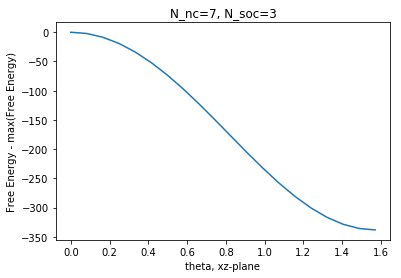

In [4]:
plt.plot(theta_array_nc_soc_xz, free_energy_array_nc_soc_xz-max(free_energy_array_nc_soc_xz))
plt.xlabel('theta, xz-plane')
plt.ylabel('Free Energy - max(Free Energy)')
plt.title("N_nc=7, N_soc=3")
#plt.savefig('free_energy_lambda_angle_xz, stength=0.8.png', dpi=200, bbox_inches='tight')
plt.show()

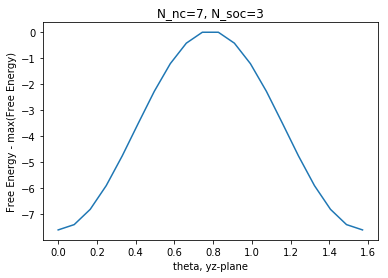

In [5]:
plt.plot(theta_array_nc_soc_yz, free_energy_array_nc_soc_yz-max(free_energy_array_nc_soc_yz))
plt.xlabel('theta, yz-plane')
plt.ylabel('Free Energy - max(Free Energy)')
plt.title("N_nc=7, N_soc=3")
#plt.savefig('free_energy_lambda_angle_yz, stength=0.8.png', dpi=200, bbox_inches='tight')
plt.show()

Phase diagram - 2D for alpha strength and angle

In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [23]:
def calculate_systems_2d(max_iter=10, 
                      beta=30,
                      alpha_R_initial = [0,0,2],
                      tol_iter = 1e-3):
    """
    Calculate the energy for SC and SOC systems at a beta.
    """
    L_y = 20
    L_z = 20
    #NC
    nc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 5, L_sc = 0, L_soc=0)
    solve_system(nc_system, max_iter, tol_iter)
    
    # SOC
    soc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 0, L_soc=5)
    solve_system(soc_system, max_iter, tol_iter)
    
    # SC
    sc_system = define_system(beta=beta, alpha_R_initial = alpha_R_initial,L_y=L_y, L_z=L_z, L_nc = 0, L_sc = 5, L_soc=0)
    solve_system(sc_system, max_iter, tol_iter)
    
    energies_nc_soc_sc = np.array([nc_system.compute_energy(), soc_system.compute_energy(), sc_system.compute_energy()])
    return energies_nc_soc_sc

def pd_search_along_alpha_2d(alpha_max, xz=False, yz=False):
    theta = np.linspace(0,np.pi/2,15)
    
    free_energies_2d = np.zeros(((len(theta), len(alpha_max), 3)))
    for j in range(len(theta)):
        # for each theta value, we do a PD over alpha-strength
        alpha = np.ones((len(alpha_max), 3), dtype=np.float64)
        for i in range(len(alpha_max)):
            alpha[i] = alpha_max[i]*alpha[i,:]

        if(xz==True):
            alpha = alpha[:]*np.array([np.sin(theta[j]), 0*theta[j], np.cos(theta[j])]) # xz plane, sin(phi)=0
        if(yz==True):
            alpha = alpha[:]*np.array([0*theta[j], np.sin(theta[j]), np.cos(theta[j])]) # yz plane, cos(phi)=0
        if((yz == False) and (xz == False)):
            print("You have to choose orientation of alpha, xz or yz!")
            return
        #print(alpha)
        free_energy = np.zeros(shape=(alpha.shape[0], 3), dtype=np.float128)
        tps = ['SC','NC', 'SOC']

        for i in range(alpha.shape[0]):
            print("---- alpha = ", alpha[i,:], "-----")
            e = calculate_systems_2d(alpha_R_initial = alpha[i,:])
            free_energy[i,:] = e[:] # es:soc energy, sc energy
        
        # add new PD for theis theta value to the total PD arrray
        free_energies_2d[j,:,:] = free_energy
    return free_energies_2d, theta, alpha_max


In [24]:
alpha_max = np.linspace(1.5,2,15)
free_energy_2d_yz, theta_array_2d_yz, alpha_array_2d_yz = pd_search_along_alpha_2d(alpha_max, xz=False, yz=True)

---- alpha =  [0.  0.  1.5] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:62: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0.4049482161914816
Iteration nr. 3
delta_diff =  0.22581113561670363
Iteration nr. 4
delta_diff =  0.12490939474287795
Iteration nr. 5
delta_diff =  0.06877356527292483
Iteration nr. 6
delta_diff =  0.037766735424256424
Iteration nr. 7
delta_diff =  0.020709431272588966
Iteration nr. 8
delta_diff =  0.011347070733822646
Iteration nr. 9
delta_diff =  0.006214618429673421
Iteration nr. 10
delta_diff =  0.0034028826674983403
Iteration nr. 11
delta_diff =  0.0018630665845882975
---- alpha =  [0.         0.         1.53571429] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0

In [25]:
alpha_max = np.linspace(1.5, 2, 15)
free_energy_2d_xz, theta_array_2d_xz, alpha_array_2d_xz = pd_search_along_alpha_2d(alpha_max, xz=True, yz=False)

---- alpha =  [0.  0.  1.5] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/solve_hamiltonian.py:62: RuntimeWarning: invalid value encountered in true_divide
  delta_diff = abs(sum((delta_store[:,0]-delta_store[:,1]) / delta_store[:,1]))


delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0.4049482161914816
Iteration nr. 3
delta_diff =  0.22581113561670363
Iteration nr. 4
delta_diff =  0.12490939474287795
Iteration nr. 5
delta_diff =  0.06877356527292483
Iteration nr. 6
delta_diff =  0.037766735424256424
Iteration nr. 7
delta_diff =  0.020709431272588966
Iteration nr. 8
delta_diff =  0.011347070733822646
Iteration nr. 9
delta_diff =  0.006214618429673421
Iteration nr. 10
delta_diff =  0.0034028826674983403
Iteration nr. 11
delta_diff =  0.0018630665845882975
---- alpha =  [0.         0.         1.53571429] -----
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  nan
Hermition:  True
Iteration nr. 1
delta_diff =  5.0
Iteration nr. 2
delta_diff =  0.0
Hermition:  True
Iteration nr. 1
delta_diff =  3.2850176487183456
Iteration nr. 2
delta_diff =  0

In [8]:
print(free_energy_2d_yz.shape)
print(theta_array_2d_yz.shape)
print(alpha_array_2d_yz.shape)

(30, 20, 3)
(30,)
(20,)


In [26]:
from mpl_toolkits import mplot3d
%matplotlib inline
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

/Users/martinedh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


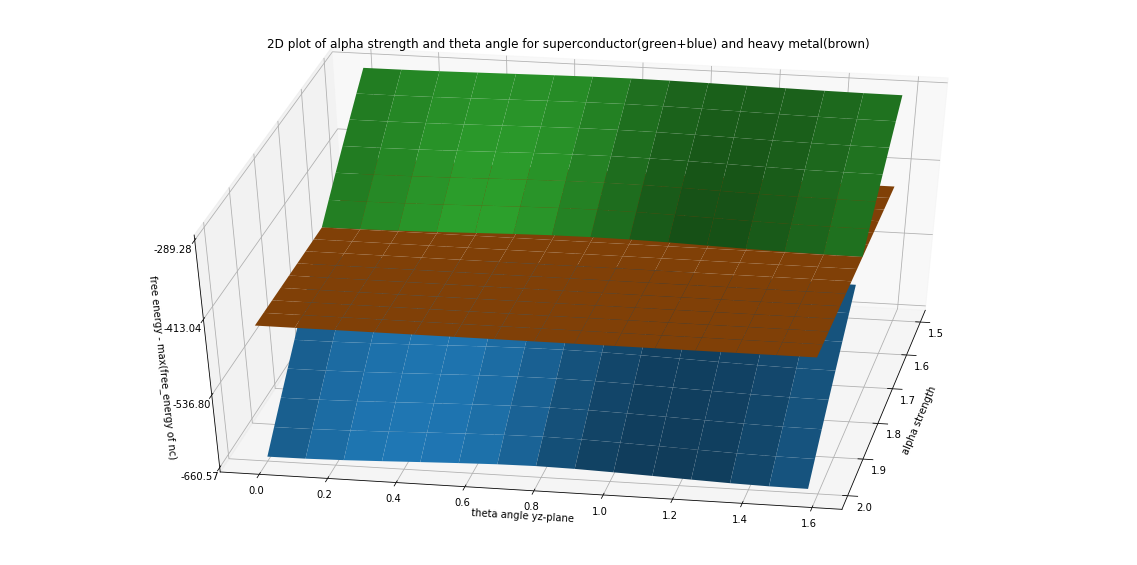

In [39]:
# yz direction
X, Y = np.meshgrid( alpha_array_2d_yz, theta_array_2d_yz,)
Z_nc = free_energy_2d_yz[:,:,0]-np.max(free_energy_2d_yz[:,:,0])
Z_soc = free_energy_2d_yz[:,:,1]-np.max(free_energy_2d_yz[:,:,0])
Z_sc = free_energy_2d_yz[:,:,2]-np.max(free_energy_2d_yz[:,:,0])

fig = plt.figure(111, figsize=(20,10))
ax = fig.gca(projection='3d')


# Plot the surface.
#surf_nc = ax.plot_surface(X, Y, Z_nc,linewidth=0, antialiased=True)
#surf_soc = ax.plot_surface(X, Y, Z_soc,linewidth=0, antialiased=True)
#surf_sc = ax.plot_surface(X, Y, Z_sc,linewidth=0, antialiased=True)

surf1= ax.plot_surface(X,Y,np.where(Z_soc<Z_sc,Z_soc,np.nan))#, label="soc")
surf2=ax.plot_surface(X,Y,Z_sc)#, label="sc")
surf3=ax.plot_surface(X,Y,np.where(Z_soc>=Z_sc,Z_soc,np.nan))#, label="soc")

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(4))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(40, 10)

ax.set_xlabel("alpha strength")
ax.set_ylabel("theta angle yz-plane")
ax.set_zlabel("free energy - max(free_energy of nc)")
ax.set_title("2D plot of alpha strength and theta angle for superconductor(green+blue) and heavy metal(brown)")
#plt.savefig('PD_2D_alpha_strength_and_theta_angel_xz_side2.png', dpi=200, bbox_inches='tight')
#plt.show()


/Users/martinedh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


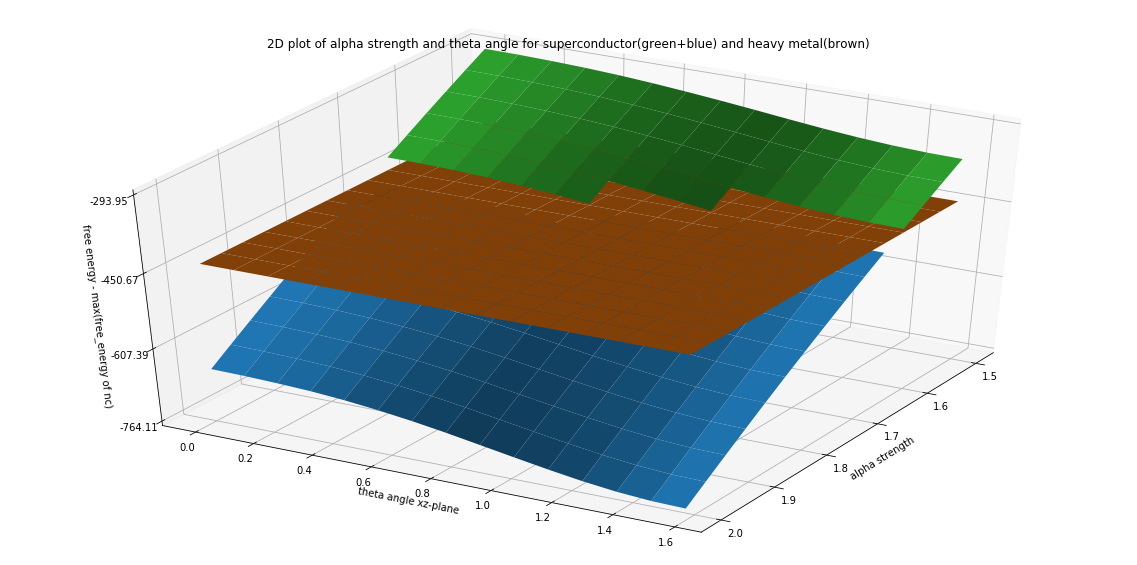

In [47]:
# xz direction
X, Y = np.meshgrid( alpha_array_2d_xz, theta_array_2d_xz,)
Z_nc = free_energy_2d_xz[:,:,0]-np.max(free_energy_2d_xz[:,:,0])
Z_soc = free_energy_2d_xz[:,:,1]-np.max(free_energy_2d_xz[:,:,0])
Z_sc = free_energy_2d_xz[:,:,2]-np.max(free_energy_2d_xz[:,:,0])

fig = plt.figure(111, figsize=(20,10))
ax = fig.gca(projection='3d')


# Plot the surface.
#surf_nc = ax.plot_surface(X, Y, Z_nc,linewidth=0, antialiased=True)
#surf_soc = ax.plot_surface(X, Y, Z_soc,linewidth=0, antialiased=True)
#surf_sc = ax.plot_surface(X, Y, Z_sc,linewidth=0, antialiased=True)

surf1= ax.plot_surface(X,Y,np.where(Z_soc<Z_sc,Z_soc,np.nan))#, label="soc")
surf2=ax.plot_surface(X,Y,Z_sc)#, label="sc")
surf3=ax.plot_surface(X,Y,np.where(Z_soc>=Z_sc,Z_soc,np.nan))#, label="soc")

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(4))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(40, 30)

ax.set_xlabel("alpha strength")
ax.set_ylabel("theta angle xz-plane")
ax.set_zlabel("free energy - max(free_energy of nc)")
ax.set_title("2D plot of alpha strength and theta angle for superconductor(green+blue) and heavy metal(brown)")
#plt.savefig('PD_2D_alpha_strength_and_theta_angel_xz_side2.png', dpi=200, bbox_inches='tight')
#plt.show()

/Users/martinedh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


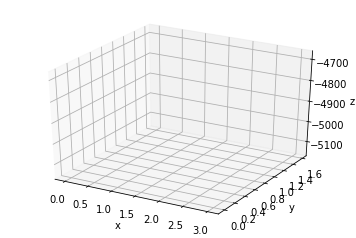

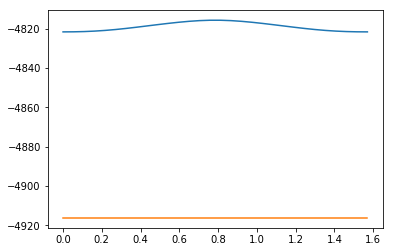

In [37]:
plt.plot(theta_array_2d_yz, free_energy_2d_yz[:,10,1])
plt.plot(theta_array_2d_yz, free_energy_2d_yz[:,10,2])
plt.show()

In [11]:
Fs = np.pad(np.array([0.3], dtype=np.complex128),  (0,8), mode='constant', constant_values=0.0)
print(Fs)

[0.3+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


In [13]:
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
        b[j][i] += i*5+j
        
print(a)
print(b)

[[ 1.  2.  3.  4.  5.]
 [ 3.  4.  5.  6.  7.]
 [ 5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11.]
 [ 9. 10. 11. 12. 13.]]
[[ 1.  6. 11. 16. 21.]
 [ 2.  7. 12. 17. 22.]
 [ 3.  8. 13. 18. 23.]
 [ 4.  9. 14. 19. 24.]
 [ 5. 10. 15. 20. 25.]]


In [17]:
print(a[:,:]*b[:,:])
c = a*b
tmp1 = np.sum(a*b)
tmp = 0
for i in range(len(c)):
    for j in range(len(c[0])):
        tmp += c[i,j]
print(tmp)
print(tmp1)

[[  1.  12.  33.  64. 105.]
 [  6.  28.  60. 102. 154.]
 [ 15.  48.  91. 144. 207.]
 [ 28.  72. 126. 190. 264.]
 [ 45. 100. 165. 240. 325.]]
2625.0
2625.0


In [16]:
a1, a2 = np.where(a>= 5.0)
print(a1)
print(a2)

[1 1 2 2 2 2 3 3 3 3]
[2 3 0 1 2 3 0 1 2 3]


In [17]:
for i in range(len(a1)):
    print(a[a1[i]][a2[i]])

5.0
6.0
5.0
6.0
7.0
8.0
7.0
8.0
9.0
10.0


In [12]:
a[2:,2:]

array([[ 7.,  8.],
       [ 9., 10.]])

In [6]:
np.tanh(b[2,:])

array([0.99505475, 0.99999977, 1.        , 1.        , 1.        ])

In [15]:
np.sum(a[0,:]*b[2,:])

245.0

In [14]:
np.matmul(a[0,:],b[2,:])

245.0

In [8]:
a = np.linspace(-3,10,14)
print(a)
print(a[a<0])

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[-3. -2. -1.]


In [9]:
a = np.ones((5,5))
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
    

In [10]:
print(a)

[[ 1.  2.  3.  4.  5.]
 [ 3.  4.  5.  6.  7.]
 [ 5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11.]
 [ 9. 10. 11. 12. 13.]]


In [3]:
a = np.array([1,2,3,4,5])

In [6]:
print(a)

for i in range(1,len(a)):
    print(a[i])

[1 2 3 4 5]
2
3
4
5


In [11]:
np.exp(1.0j * np.pi/4)

(0.7071067811865476+0.7071067811865475j)